## Table Of Content
# Initial Investigation
1. `Audit` Table Pre-Processing
2. `Query` Table Pre-Processing
3. Patient Check in `Query` and in `Audit`
4. Descriptions of `FormOID` and `ItemOID`

# Top Audit And Query Properties 
1. Top 10 Audit and Query `SubjectIDs` (most data points)
2. Top 10 Audit and Query `FormOIDs` (most data points)
3. Top 10 Audit and Query `ItemOIDs` (most data points)

# Audit Table Analysis
1. Distribution of FormOIDS per patients
2. Distribution of ItemOIDs per patients
3. Distribution of SiteLocationID per patients
4. Distribution of FormOID per Top 10 CM ItemOID
5. Distribution of Subjects per Top 10 CM ItemOID

# More Data Cleaning
1. Cleaning Audit and Query Tables
2. Top 10 Results on Numerical Query Table
3. Investigation of 60 Dose value

# `LB_CHEM.UREA` Patient Event Flow

## Average, standard deviation of Number of Days between Open And Answer Dates Queries

## Distribution of Dose for 'CM' and EX formOIDS

## Top 10 QueryValue

## Distribution of Query Values per Query Responses

# Finding Outliers
1. Analysis of `LB_HEME.LYMPHABS`
2. Detecting `LB_HEME.LYMPHABS` outliers
3. Analysis of `LB_HEME.NEUTABS`
4. Detecting `LB_HEME.NEUTABS` outliers
5. Analysis of `AE.AETOXGR`

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, show, output_notebook
from pathlib import Path

style.use("fivethirtyeight")
from tableone import TableOne

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
from typing import List

# Initial Investigation

## 1. Audit Table Pre-Processing

In [4]:
audit = pd.read_csv(Path("data/Audit.csv"), low_memory=False)
audit.head()

,StudyOID,SubjectName,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,EntryDate,ActionCategory,ModifiedDate,SiteLocationID,Unnamed: 11
0,CLINTEK-011,0084-007,TL,TL.TLOTHSP,NaN,"If Other, Specify",NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084,NaN
1,CLINTEK-011,0084-007,TL,TL.TLDAT,NaN,Date of image,NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084,NaN
2,CLINTEK-011,0084-007,TL,TL.TLMETH,NaN,Method,NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084,NaN
3,CLINTEK-011,0084-007,TL,TL.TLMETHX,NaN,"Other, Specify",NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084,NaN
4,CLINTEK-011,0084-007,TL,TL.TLLD,NaN,Longest Diameter,NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084,NaN


In [5]:
audit.describe()

,StudyOID,SubjectName,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,EntryDate,ActionCategory,ModifiedDate,SiteLocationID,Unnamed: 11
count,79330,79350,79352,79352,36991,79295,57375,79234,79234,79234,79234,4
unique,35,92,75,633,22,473,6087,406,11,3,19,2
top,CLINTEK-011,0007-008,AE,CM.CMEVNO,Adverse Events,"If other, specify",0,11/5/2015,Entered,8/3/2018,080-0703,080-0703
freq,79293,5616,13604,1004,13604,4587,9199,2250,47647,79230,10706,3


In [6]:
audit.dtypes

StudyOID               object
SubjectName            object
FormOID                object
ItemOID                object
FormOID_Description    object
ItemOID_Description    object
ItemValue              object
EntryDate              object
ActionCategory         object
ModifiedDate           object
SiteLocationID         object
Unnamed: 11            object
dtype: object

In [7]:
audit.shape

(79360, 12)

### We keep only *CLINTEK-011*

In [8]:
audit = audit[audit.StudyOID == "CLINTEK-011"]
audit.head()

,StudyOID,SubjectName,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,EntryDate,ActionCategory,ModifiedDate,SiteLocationID,Unnamed: 11
0,CLINTEK-011,0084-007,TL,TL.TLOTHSP,NaN,"If Other, Specify",NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084,NaN
1,CLINTEK-011,0084-007,TL,TL.TLDAT,NaN,Date of image,NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084,NaN
2,CLINTEK-011,0084-007,TL,TL.TLMETH,NaN,Method,NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084,NaN
3,CLINTEK-011,0084-007,TL,TL.TLMETHX,NaN,"Other, Specify",NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084,NaN
4,CLINTEK-011,0084-007,TL,TL.TLLD,NaN,Longest Diameter,NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084,NaN


In [9]:
audit = audit.drop(["StudyOID"], axis=1)

In [10]:
audit.columns

Index(['SubjectName', 'FormOID', 'ItemOID', 'FormOID_Description', 'ItemOID_Description', 'ItemValue', 'EntryDate', 'ActionCategory', 'ModifiedDate', 'SiteLocationID', 'Unnamed: 11'], dtype='object')

In [11]:
def get_missing_data(df: pd.DataFrame) -> pd.DataFrame:
    # Computing missing data 
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_data  = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
    return missing_data

In [12]:
# Missing data. 
get_missing_data(audit)

,Total,Percent
Unnamed: 11,79289,99.994955
FormOID_Description,42361,53.423379
ItemValue,21918,27.641784
EntryDate,59,0.074408
ActionCategory,59,0.074408
ModifiedDate,59,0.074408
SiteLocationID,59,0.074408
SubjectName,0,0.000000
FormOID,0,0.000000
ItemOID,0,0.000000


In [13]:
audit[~audit["Unnamed: 11"].isnull()]

,SubjectName,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,EntryDate,ActionCategory,ModifiedDate,SiteLocationID,Unnamed: 11
18445,0409-008,TL,TL.TLOTHSP,NaN,"If Other, Specify",NaN,LEFT ILIAC,35:45.0,EnteredWithChangeCode,22:34.5,080-0409
49588,0703-002,PC2,PC2.PCREAS,NaN,Reason Not Done,due to,organizational reasons,58:53.0,Entered,22:34.5,080-0703
49593,0703-002,PC2,PC2.PCREAS,NaN,Reason Not Done,due to,organizational reasons,58:53.0,Entered,22:34.5,080-0703
61039,0703-007,AE,AE.AETERM,Adverse Events,Reported Term for the Adverse Event,Eyes,photosensitive and burning,39:40.0,Entered,22:34.5,080-0703


In [14]:
audit = audit[~audit["EntryDate"].isnull()]
audit = audit[~audit["ModifiedDate"].isnull()]
audit = audit[~audit["SiteLocationID"].isnull()]
audit = audit[~audit["ActionCategory"].isnull()]
audit.shape

(79234, 11)

In [15]:
audit = audit.drop(["Unnamed: 11"], axis=1)
audit = audit.rename({"SubjectName":"SubjectID"}, axis=1)
audit.columns

Index(['SubjectID', 'FormOID', 'ItemOID', 'FormOID_Description', 'ItemOID_Description', 'ItemValue', 'EntryDate', 'ActionCategory', 'ModifiedDate', 'SiteLocationID'], dtype='object')

In [16]:
audit.describe()

,SubjectID,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,EntryDate,ActionCategory,ModifiedDate,SiteLocationID
count,79234,79234,79234,36905,79234,57318,79234,79234,79234,79234
unique,35,71,631,9,472,6051,406,11,3,19
top,0007-008,AE,CM.CMEVNO,Adverse Events,"If other, specify",0,11/5/2015,Entered,8/3/2018,080-0703
freq,5614,13595,1004,13595,4578,9199,2250,47647,79230,10706


In [17]:
audit_tmp = audit.copy()
audit_tmp = audit_tmp.set_index("EntryDate")
audit_tmp = audit_tmp.sort_index()
audit_tmp.head()

,SubjectID,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,ActionCategory,ModifiedDate,SiteLocationID
EntryDate,,,,,,,,,
1/10/2017,0684-002,DS,DS.DSSCRN,Disposition,Reason for screen failure,NaN,EnteredEmpty,8/3/2018,080-0684
1/10/2017,0072-008,PT,PT.PTDOSU,NaN,Dose unit,OTHER,EnteredWithChangeCode,8/3/2018,080-0072
1/10/2017,0072-008,PT,PT.PTDOSUSP,NaN,"If other, specify",mg/m2,EnteredWithChangeCode,8/3/2018,080-0072
1/10/2017,0703-002,AE,AE.AEACNCM,Adverse Events,Specify concomitant medication numbers,"24, 23",EnteredWithChangeCode,8/3/2018,080-0703
1/10/2017,0703-002,AE,AE.AEENDAT,Adverse Events,End Date,9-Sep-15,EnteredWithChangeCode,8/3/2018,080-0703


In [18]:
audit_tmp.tail()

,SubjectID,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,ActionCategory,ModifiedDate,SiteLocationID
EntryDate,,,,,,,,,
9/9/2016,8808-008,OP,OP.OPACUDR,NaN,Right eye (OD),NaN,EnteredEmptyWithChangeCode,8/3/2018,080-8808
LEFT ILIAC,0409-008,TL,TL.TLOTHSP,NaN,"If Other, Specify",NaN,35:45.0,EnteredWithChangeCode,22:34.5
organizational reasons,0703-002,PC2,PC2.PCREAS,NaN,Reason Not Done,due to,58:53.0,Entered,22:34.5
organizational reasons,0703-002,PC2,PC2.PCREAS,NaN,Reason Not Done,due to,58:53.0,Entered,22:34.5
photosensitive and burning,0703-007,AE,AE.AETERM,Adverse Events,Reported Term for the Adverse Event,Eyes,39:40.0,Entered,22:34.5


In [19]:
formoid_count = audit.groupby("FormOID").size()
formoid_count = formoid_count.to_frame()
formoid_count.columns = ["Count"]
formoid_count = formoid_count.sort_values(by="Count", ascending=False)
formoid_count = formoid_count.head(20)

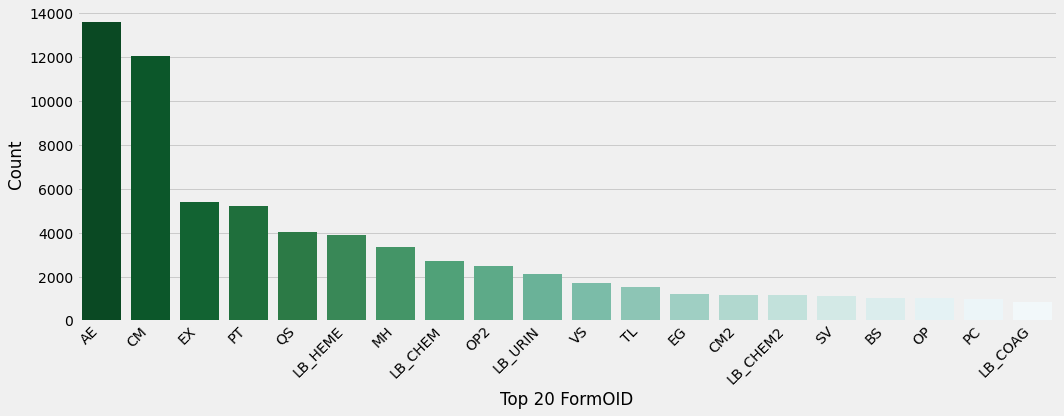

In [20]:
plt.figure(figsize=(15, 6))
chart = sns.barplot(x=formoid_count.index, y=formoid_count.Count, palette=sns.color_palette("BuGn_r", n_colors=len(formoid_count)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Top 20 FormOID")
plt.tight_layout()
plt.show()
plt.close()

In [21]:
itemoid_count = audit.groupby("ItemOID").size()
itemoid_count = itemoid_count.to_frame()
itemoid_count.columns = ["Count"]
itemoid_count = itemoid_count.sort_values(by="Count", ascending=False)
itemoid_count = itemoid_count.head(20)

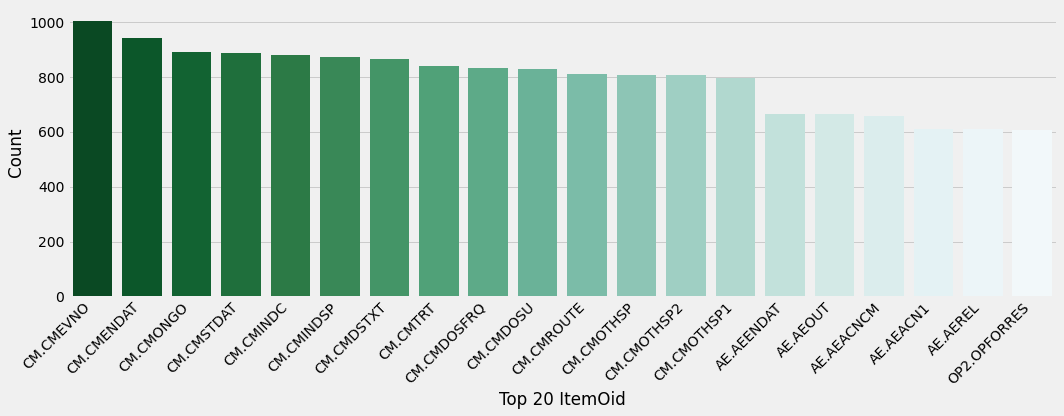

In [22]:
plt.figure(figsize=(15, 6))
chart = sns.barplot(x=itemoid_count.index, y=itemoid_count.Count, palette=sns.color_palette("BuGn_r", n_colors=len(formoid_count)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Top 20 ItemOid")
plt.tight_layout()
plt.show()
plt.close()

### Number of patients in the study

In [23]:
len(audit["SubjectID"].astype(str).unique())

35

## 2. Query Table Pre-Processing

In [24]:
query = pd.read_csv(Path("data/Query.csv"))
query.head()

,StudyOID,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,OpenDate,AnswerDate,CloseDate,QueryValue,QueryResponse,Unnamed: 12
0,CLINTEK-011,0007-008,LNB,Lymph Node Biopsy,LNB.LNBYN,Was lymph node biopsy performed?,N,11/20/2015,1/27/2016,2/18/2016,Please update to No. Not done per Dr. Byrd as...,Corrected,NaN
1,CLINTEK-011,0007-008,LNB,Lymph Node Biopsy,LNB.LNBYN,Was lymph node biopsy performed?,N,11/20/2015,1/27/2016,2/18/2016,Please update to No. Not done per Dr. Byrd as...,Corrected,NaN
2,CLINTEK-011,0007-008,TL,Tumor Assessment - Target Lesions,TL.TLYN,Was Target Lesion Assessment Performed?,Y,11/20/2015,12/3/2015,2/18/2016,"Please complete Target, Non Target and Spleen/...",Source Document is Tumor Measurement Form,NaN
3,CLINTEK-011,0007-008,NC,Nutritional Counseling,NC.NCYN,Was nutritional counseling provided?,N,11/20/2015,NaN,NaN,Please provide source. There is no Nutritiona...,NaN,NaN
4,CLINTEK-011,0007-008,NC,Nutritional Counseling,NC.NCYN,Was nutritional counseling provided?,N,11/20/2015,NaN,NaN,Please provide source. There is no Nutritiona...,NaN,NaN


In [25]:
query.columns

Index(['StudyOID', 'SubjectID', 'FormOID', 'FormName', 'ItemOID', 'ItemLabel', 'ItemValue', 'OpenDate', 'AnswerDate', 'CloseDate', 'QueryValue', 'QueryResponse', 'Unnamed: 12'], dtype='object')

In [26]:
query.shape

(6044, 13)

In [27]:
# Computing missing data. 
get_missing_data(query)

,Total,Percent
Unnamed: 12,6023,99.652548
ItemValue,1312,21.707478
QueryResponse,1222,20.218398
AnswerDate,1098,18.166777
CloseDate,965,15.966248
QueryValue,281,4.649239
OpenDate,279,4.616148
ItemLabel,240,3.970880
FormOID,238,3.937790
FormName,229,3.788882


In [28]:
query.ItemValue.unique()

array(['N', 'Y', '69.7', ..., 'LEFT AXILLA', 'Un UNK 2010', 'DURING'],
      dtype=object)

In [29]:
query[~query["Unnamed: 12"].isnull()].shape

(21, 13)

In [30]:
query = query.drop(["Unnamed: 12"], axis=1)

In [31]:
query.shape

(6044, 12)

In [32]:
query[query.StudyOID == "CLINTEK-011"].shape

(5795, 12)

In [33]:
query[query.StudyOID != "CLINTEK-011"].shape

(249, 12)

### Same for Query Data, we keep only *CLINTEK-011* study

In [34]:
query = query[query.StudyOID == "CLINTEK-011"]
query.shape

(5795, 12)

In [35]:
query = query.drop(["StudyOID"], axis=1)

In [36]:
query.head()

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,OpenDate,AnswerDate,CloseDate,QueryValue,QueryResponse
0,0007-008,LNB,Lymph Node Biopsy,LNB.LNBYN,Was lymph node biopsy performed?,N,11/20/2015,1/27/2016,2/18/2016,Please update to No. Not done per Dr. Byrd as...,Corrected
1,0007-008,LNB,Lymph Node Biopsy,LNB.LNBYN,Was lymph node biopsy performed?,N,11/20/2015,1/27/2016,2/18/2016,Please update to No. Not done per Dr. Byrd as...,Corrected
2,0007-008,TL,Tumor Assessment - Target Lesions,TL.TLYN,Was Target Lesion Assessment Performed?,Y,11/20/2015,12/3/2015,2/18/2016,"Please complete Target, Non Target and Spleen/...",Source Document is Tumor Measurement Form
3,0007-008,NC,Nutritional Counseling,NC.NCYN,Was nutritional counseling provided?,N,11/20/2015,NaN,NaN,Please provide source. There is no Nutritiona...,NaN
4,0007-008,NC,Nutritional Counseling,NC.NCYN,Was nutritional counseling provided?,N,11/20/2015,NaN,NaN,Please provide source. There is no Nutritiona...,NaN


In [37]:
print(f"# of patients:{query.SubjectID.nunique()}")

# of patients:35


In [38]:
query.describe()

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,OpenDate,AnswerDate,CloseDate,QueryValue,QueryResponse
count,5795,5795,5795,5795,5795,4732,5765,4946,5079,5763,4822
unique,35,65,65,399,318,1079,287,288,268,2584,887
top,0085-008,LB_HEME,Hematology,AE.AETERM,Action taken with study drug,Y,6/14/2016,8/4/2016,8/9/2016,Please update Clinical significance.,Updated
freq,668,835,835,264,295,590,400,142,168,196,782


## 3. All the patients in Query are in Audit

In [39]:
audit_subjectnames = audit.SubjectID.unique()

In [40]:
qsubject_ids = query.SubjectID.unique()
qsubject_ids.shape

(35,)

In [41]:
np.setdiff1d(qsubject_ids, audit_subjectnames)

array([], dtype=object)

In [42]:
np.setdiff1d(audit_subjectnames, qsubject_ids)

array([], dtype=object)

In [43]:
audit.shape

(79234, 10)

In [44]:
audit = audit[audit.SubjectID.isin(qsubject_ids)]
audit.shape

(79234, 10)

## 4. Descriptions of FormOID and ItemOID

In [45]:
ct = pd.crosstab(audit.FormOID, audit.FormOID_Description)
formOID_desc= {k: v for k, v in zip(ct.index.values, ct.columns.values)}
formOID_desc

{'AE': 'Adverse Events',
 'CM': 'Concomitant Meds',
 'DA': 'Disposition',
 'DS': 'Drug Accountability',
 'EX': 'Exposure',
 'IE': 'Inclusion/Exclusion',
 'MH': 'Medical History',
 'SU': 'Substance Use',
 'VS': 'Vital Signs'}

In [46]:
form_item_desc = audit[["FormOID","ItemOID", "ItemOID_Description"]]
form_item_desc.head()

,FormOID,ItemOID,ItemOID_Description
0,TL,TL.TLOTHSP,"If Other, Specify"
1,TL,TL.TLDAT,Date of image
2,TL,TL.TLMETH,Method
3,TL,TL.TLMETHX,"Other, Specify"
4,TL,TL.TLLD,Longest Diameter


In [47]:
form_item_desc.query("ItemOID == 'LB_HEME.LBYN'")["ItemOID_Description"].iloc[0]

'Was Hematology Sample Collected?'

In [48]:
form_item_desc.query("ItemOID == 'LB_HEME.LYMPHABS'")["ItemOID_Description"].iloc[0]

'Lymphocytes (absolute count)'

In [49]:
form_item_desc.query("FormOID == 'CM'")

,FormOID,ItemOID,ItemOID_Description
168,CM,CM.CMINDSP,"If other, specify"
309,CM,CM.CMEVNO,Event number
820,CM,CM.CMEVNO,Event number
821,CM,CM.CMEVNO,Event number
822,CM,CM.CMTRT,Medication / Therapy Name
...,...,...,...
79074,CM,CM.CMROUTE,Route
79075,CM,CM.CMOTHSP1,"If other, specify"
79076,CM,CM.CMDOSFRQ,Frequency
79077,CM,CM.CMOTHSP2,"If Other, specify"


In [50]:
form_item_desc[form_item_desc["ItemOID"].isin(itemoid_count.index.tolist())].drop_duplicates()

,FormOID,ItemOID,ItemOID_Description
168,CM,CM.CMINDSP,"If other, specify"
191,AE,AE.AEENDAT,End Date
194,AE,AE.AEOUT,Outcome
294,AE,AE.AEREL,Relationship to study drug A
296,AE,AE.AEACN1,None - other action
298,AE,AE.AEACNCM,Specify concomitant medication numbers
309,CM,CM.CMEVNO,Event number
545,OP2,OP2.OPFORRES,Result
822,CM,CM.CMTRT,Medication / Therapy Name
823,CM,CM.CMINDC,Indication


# Top Audit And Query Properties

In [51]:
def get_top_n_percent(df: pd.DataFrame, col_to_agg: str, /,*, 
                      top: int = None,
                      perc_filter_val: str = None) -> pd.DataFrame:
    s = df.groupby(col_to_agg).size().sort_values(ascending=False)
    s = s.to_frame()
    s.columns = ["Overall"]
    s = s.assign(perc= (s["Overall"]/s["Overall"].sum()) * 100)
    s["perc"] = round(s["perc"], 2)
    if perc_filter_val:
        s = s.query(f"perc >= {perc_filter_val}")
    if top:
        s = s.nlargest(top, "perc")
    return s

## 1. Top 10 Audit and Query SubjectIDs (most data points)

In [52]:
top_subjectID = get_top_n_percent(audit, "SubjectID", top=10)
top_subjectID

,Overall,perc
SubjectID,,
0007-008,5614,7.09
0085-008,4867,6.14
0400-008,4136,5.22
0007-007,3942,4.98
0001-002,3688,4.65
0001-007,3633,4.59
0604-002,3552,4.48
0703-008,3313,4.18
0407-008,3025,3.82


In [53]:
top_subjectID_val = top_subjectID.index.values
top_subjectID_val

array(['0007-008', '0085-008', '0400-008', '0007-007', '0001-002',
       '0001-007', '0604-002', '0703-008', '0407-008', '8808-008'],
      dtype=object)

In [54]:
top_subjectID_query = get_top_n_percent(query, "SubjectID", top=10)
top_subjectID_query

,Overall,perc
SubjectID,,
0085-008,668,11.53
0001-007,317,5.47
0007-008,313,5.40
0085-007,283,4.88
8800-007,271,4.68
0085-002,266,4.59
0001-002,263,4.54
0007-007,235,4.06
0407-008,228,3.93


In [55]:
top_subjectID_query_val = top_subjectID_query.index.values
top_subjectID_query_val

array(['0085-008', '0001-007', '0007-008', '0085-007', '8800-007',
       '0085-002', '0001-002', '0007-007', '0407-008', '0084-008'],
      dtype=object)

###  Which subjects were queried among the top subjects (with most data points)?

In [56]:
np.intersect1d(top_subjectID_val,top_subjectID_query_val)

array(['0001-002', '0001-007', '0007-007', '0007-008', '0085-008',
       '0407-008'], dtype=object)

## 2. Top 10 Audit and Query FormOIDs (most data points)

In [57]:
top_FormOID = get_top_n_percent(audit, "FormOID", top=10)
top_FormOID

,Overall,perc
FormOID,,
AE,13595,17.16
CM,12061,15.22
EX,5389,6.80
PT,5228,6.60
QS,4053,5.12
LB_HEME,3911,4.94
MH,3353,4.23
LB_CHEM,2715,3.43
OP2,2504,3.16


In [58]:
top_FormOID_val = top_FormOID.index.values
top_FormOID_val

array(['AE', 'CM', 'EX', 'PT', 'QS', 'LB_HEME', 'MH', 'LB_CHEM', 'OP2',
       'LB_URIN'], dtype=object)

In [59]:
top_FormOID_query = get_top_n_percent(query, "FormOID", top=10)
top_FormOID_query

,Overall,perc
FormOID,,
LB_HEME,835,14.41
EX,761,13.13
AE,642,11.08
PT,424,7.32
LB_CHEM,386,6.66
CM,312,5.38
LB_CHEM2,219,3.78
LB_URIN,141,2.43
LB_UM,139,2.40


In [60]:
top_FormOID_query_val = top_FormOID_query.index.values
top_FormOID_query_val

array(['LB_HEME', 'EX', 'AE', 'PT', 'LB_CHEM', 'CM', 'LB_CHEM2',
       'LB_URIN', 'LB_UM', 'LB_COAG'], dtype=object)

### Which formOIDs were queried among the top formOIDs (with most data points)?

In [61]:
np.intersect1d(top_FormOID_val,top_FormOID_query_val)

array(['AE', 'CM', 'EX', 'LB_CHEM', 'LB_HEME', 'LB_URIN', 'PT'],
      dtype=object)

## 3. Top 10 Audit and Query ItemOIDs (with most data points)

In [62]:
top_ItemOID = get_top_n_percent(audit, "ItemOID", top=10)
top_ItemOID

,Overall,perc
ItemOID,,
CM.CMEVNO,1004,1.27
CM.CMENDAT,942,1.19
CM.CMONGO,890,1.12
CM.CMSTDAT,887,1.12
CM.CMINDC,880,1.11
CM.CMINDSP,874,1.10
CM.CMDSTXT,865,1.09
CM.CMTRT,838,1.06
CM.CMDOSFRQ,833,1.05


In [63]:
top_ItemOID_val = top_ItemOID.index.values
top_ItemOID_val

array(['CM.CMEVNO', 'CM.CMENDAT', 'CM.CMONGO', 'CM.CMSTDAT', 'CM.CMINDC',
       'CM.CMINDSP', 'CM.CMDSTXT', 'CM.CMTRT', 'CM.CMDOSFRQ', 'CM.CMDOSU'],
      dtype=object)

In [64]:
top_ItemOID_query = get_top_n_percent(query, "ItemOID", top=10)
top_ItemOID_query

,Overall,perc
ItemOID,,
AE.AETERM,264,4.56
EX.EXACTION,232,4.00
PT.PTPRDAT,152,2.62
EX.EXPDOS,137,2.36
EX.EXREGCH,124,2.14
CM.CMEVNO,88,1.52
LB_UM.LBUMDAT,82,1.42
PT.PTTRT,78,1.35
CM.CMTRT,77,1.33


In [65]:
top_ItemOID_query_val = top_ItemOID_query.index.values
top_ItemOID_query_val

array(['AE.AETERM', 'EX.EXACTION', 'PT.PTPRDAT', 'EX.EXPDOS',
       'EX.EXREGCH', 'CM.CMEVNO', 'LB_UM.LBUMDAT', 'PT.PTTRT', 'CM.CMTRT',
       'AE.AEENDAT'], dtype=object)

### Which itemOIDs were queried among the top itemOIDs (with most data points)?

In [66]:
np.intersect1d(top_ItemOID_val,top_ItemOID_query_val)

array(['CM.CMEVNO', 'CM.CMTRT'], dtype=object)

#

In [67]:
def create_count_df(in_df: pd.DataFrame, feature: str, /, *, in_percent: bool=False) -> pd.DataFrame:
    '''
    Creates a table grouped by feature and patient
    Counts number of events in that table grouped by feature and patient
    If `in_percent` is specified,  the percentage compared to the total number of features is computed instead of raw count.
    '''
    df = in_df.copy()
    df = df.groupby([feature, 'SubjectID']).size()
    df = df.reset_index()
    df = df.rename({0:"count"},axis=1)
    if not in_percent:
        return df
    df = df.assign(perc= (df["count"]/df["count"].sum()) * 100)
    df.drop(["count"], axis=1, inplace=True)
    return df

In [68]:
def create_barh_df(in_df: pd.DataFrame, 
                   feature: str,
                   /,
                   *,
                   feature_filter:List[str]=['All'], 
                   subject_filter:List[str]=['All'], 
                   in_percent: bool = False,
                  ) -> pd.DataFrame:
    '''Created a Pivot Table Feature x SubjectID.'''
    df = in_df.copy()
    df = df.reset_index()
    if feature_filter[0] != 'All':
        mask = df[feature].isin(feature_filter)
        df = df[mask]
    if subject_filter[0] != 'All':
        mask = df['SubjectID'].isin(subject_filter)
        df = df[mask]
    count_col = "count"
    if in_percent:
        count_col = "perc"
    df = df.pivot(feature, 'SubjectID', count_col).fillna(0)
    df = df.T
    df.loc[:,'row_total'] = df.sum(numeric_only=True, axis=1)
    df = df.sort_values(by=['row_total'])
    df = df.drop(['row_total'], axis=1)
    return df   

In [69]:
def plot_barh(df: pd.DataFrame, 
              agg_feature: str,
              /,
              *,
              data_path: Path = None,
              in_percent: bool = False,
             ) -> None:

    ''' Plot of feature by patients as raw counts or percentage as indicated by `in_percent`'''
    
    ax = df.plot(kind='barh', stacked=True, figsize=(15,10), colormap='Paired')
    
    indices = df.index.tolist() 
    ax.set_ylim(0, len(indices))
    tick_fs = int((len(indices)-135)/-8)
    axis_title_fs = tick_fs + 2    
    if len(df.columns) > len(indices):
        legend_fs = int(tick_fs/1.5)
    else:
        legend_fs = tick_fs
    y_agg_unit = 'Patients'
    x_label_val = 'Count'
    if in_percent:
        x_label_val = f'Percentages of Total of {agg_feature} Counts'
    ax.set_xlabel(f'{x_label_val}',fontsize=axis_title_fs, labelpad=10)
    ax.set_ylabel(y_agg_unit, fontsize=axis_title_fs, labelpad=10)
    y_index = np.arange(0, len(indices)) 
    ax.set_yticks(y_index)
    ax.tick_params(axis='y')
    plt.xticks(fontsize=tick_fs)
    plt.yticks(fontsize=tick_fs)
    plt.legend(fontsize=legend_fs) 
    ax.set_title(f'Distribution of {agg_feature}s per {y_agg_unit} (as {x_label_val})', fontsize=axis_title_fs+2)
    plt.axis('tight')

    sns.despine()
    plt.tight_layout()
    if data_path is not None:
         print(f"Save figure:{data_path}")
         Path(f"{data_path.parent}").mkdir(parents=True, exist_ok=True)
         plt.savefig(data_path, dpi=150, facecolor='w', bbox_inches='tight')
    plt.show()
    plt.close()

# Audit Table Analysis

## 1. Distribution of FormOIDS per patients

In [70]:
formoid_subject_df = create_count_df(audit, "FormOID", in_percent = True)
formoid_subject_df

,FormOID,SubjectID,perc
0,AE,0001-002,0.769872
1,AE,0001-007,0.667643
2,AE,0007-007,1.361789
3,AE,0007-008,1.806043
4,AE,0072-008,0.032814
...,...,...,...
1658,VS,0703-009,0.079511
1659,VS,0709-008,0.054270
1660,VS,8800-007,0.108539
1661,VS,8800-008,0.050483


In [71]:
formoid_subject_bardf = create_barh_df(formoid_subject_df, "FormOID", 
                                       feature_filter=top_FormOID_val, subject_filter=top_subjectID_val, in_percent = True)
formoid_subject_bardf

/var/folders/46/4k3zbt7527qgn5sdg7lzzxh80000gn/T/ipykernel_56868/1260860947.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.pivot(feature, 'SubjectID', count_col).fillna(0)


FormOID,AE,CM,EX,LB_CHEM,LB_HEME,LB_URIN,MH,OP2,PT,QS
SubjectID,,,,,,,,,,
8808-008,0.208244,0.058056,0.560365,0.212030,0.407653,0.165333,0.051745,0.118636,0.055532,0.342025
0703-008,0.503572,1.047530,0.161547,0.150188,0.181740,0.119898,0.064366,0.127471,0.085822,0.228437
0407-008,0.832976,0.442992,0.195623,0.142616,0.267562,0.117374,0.021455,0.140091,0.297852,0.227175
0001-007,0.667643,0.266300,0.600752,0.183002,0.323094,0.170381,0.051745,0.114850,0.431633,0.283969
0001-002,0.769872,0.333190,0.320569,0.232224,0.234748,0.131257,0.083298,0.126208,0.714340,0.283969
0604-002,0.879673,1.607896,0.126208,0.080773,0.103491,0.050483,0.039125,0.109801,0.296590,0.170381
0007-007,1.361789,0.835500,0.324356,0.143878,0.236010,0.136305,0.046697,0.111063,0.112326,0.282707
0400-008,1.842643,1.230532,0.172906,0.071939,0.156498,0.078249,0.277659,0.113588,0.234748,0.113588
0085-008,1.151021,0.373577,1.193932,0.238534,0.362218,0.194361,0.169119,0.111063,0.420274,0.342025


Save figure:figures/patients_formoids_perc.png


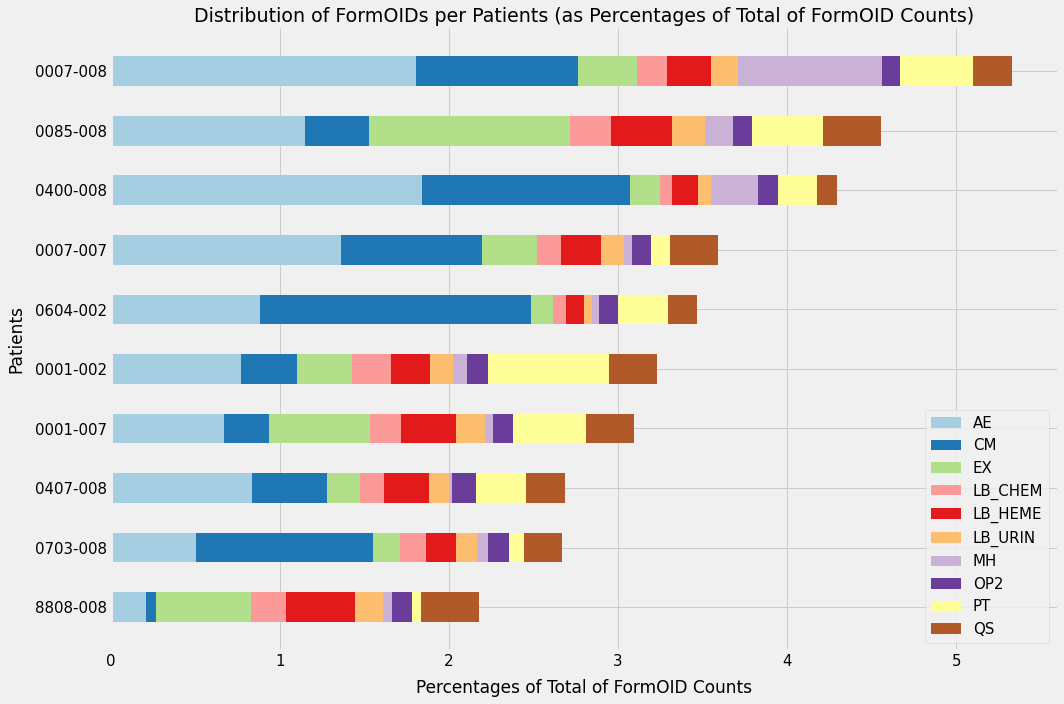

In [72]:
plot_barh(formoid_subject_bardf, 'FormOID', in_percent=True, data_path=Path("figures/patients_formoids_perc.png"))

In [73]:
formoid_subject_df = create_count_df(audit, "FormOID")
formoid_subject_df.head(4)

,FormOID,SubjectID,count
0,AE,0001-002,610
1,AE,0001-007,529
2,AE,0007-007,1079
3,AE,0007-008,1431


In [74]:
formoid_subject_bardf = create_barh_df(formoid_subject_df, "FormOID", 
                                       feature_filter=top_FormOID_val, subject_filter=top_subjectID_val)
formoid_subject_bardf

/var/folders/46/4k3zbt7527qgn5sdg7lzzxh80000gn/T/ipykernel_56868/1260860947.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.pivot(feature, 'SubjectID', count_col).fillna(0)


FormOID,AE,CM,EX,LB_CHEM,LB_HEME,LB_URIN,MH,OP2,PT,QS
SubjectID,,,,,,,,,,
8808-008,165,46,444,168,323,131,41,94,44,271
0703-008,399,830,128,119,144,95,51,101,68,181
0407-008,660,351,155,113,212,93,17,111,236,180
0001-007,529,211,476,145,256,135,41,91,342,225
0001-002,610,264,254,184,186,104,66,100,566,225
0604-002,697,1274,100,64,82,40,31,87,235,135
0007-007,1079,662,257,114,187,108,37,88,89,224
0400-008,1460,975,137,57,124,62,220,90,186,90
0085-008,912,296,946,189,287,154,134,88,333,271


Save figure:figures/patients_formoids.png


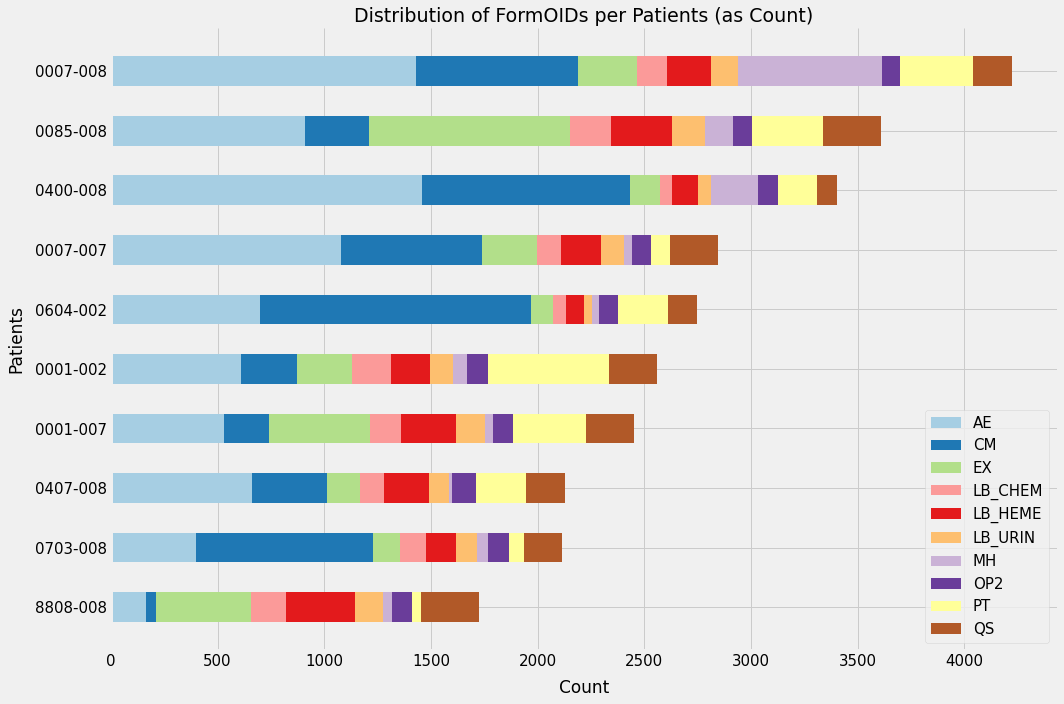

In [75]:
plot_barh(formoid_subject_bardf, "FormOID", data_path=Path("figures/patients_formoids.png"))

## 2. Distribution of ItemOIDs per patients

In [76]:
itemoid_subject_df = create_count_df(audit, "ItemOID", in_percent = True)
itemoid_subject_df

,ItemOID,SubjectID,perc
0,AE.AEACN,0001-002,0.030290
1,AE.AEACN,0001-007,0.025242
2,AE.AEACN,0007-007,0.053008
3,AE.AEACN,0007-008,0.068153
4,AE.AEACN,0072-008,0.001262
...,...,...,...
14937,VS.Z_BSA,0703-009,0.010097
14938,VS.Z_BSA,0709-008,0.005048
14939,VS.Z_BSA,8800-007,0.011359
14940,VS.Z_BSA,8800-008,0.006310


In [77]:
itemoid_subject_bardf = create_barh_df(itemoid_subject_df, "ItemOID", 
                                        feature_filter=top_ItemOID_val, subject_filter=top_subjectID_val, in_percent = True)
itemoid_subject_bardf

/var/folders/46/4k3zbt7527qgn5sdg7lzzxh80000gn/T/ipykernel_56868/1260860947.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.pivot(feature, 'SubjectID', count_col).fillna(0)


ItemOID,CM.CMDOSFRQ,CM.CMDOSU,CM.CMDSTXT,CM.CMENDAT,CM.CMEVNO,CM.CMINDC,CM.CMINDSP,CM.CMONGO,CM.CMSTDAT,CM.CMTRT
SubjectID,,,,,,,,,,
8808-008,0.003786,0.005048,0.003786,0.005048,0.003786,0.003786,0.005048,0.005048,0.003786,0.003786
0001-007,0.016407,0.017669,0.018931,0.021455,0.022718,0.017669,0.016407,0.017669,0.034076,0.016407
0001-002,0.021455,0.022718,0.025242,0.029028,0.035338,0.020193,0.021455,0.026504,0.023980,0.020193
0085-008,0.023980,0.023980,0.032814,0.026504,0.040387,0.026504,0.023980,0.025242,0.030290,0.022718
0407-008,0.032814,0.034076,0.031552,0.032814,0.030290,0.030290,0.030290,0.034076,0.032814,0.032814
0007-007,0.060580,0.056794,0.059318,0.066890,0.064366,0.066890,0.061842,0.064366,0.055532,0.056794
0007-008,0.066890,0.061842,0.063104,0.079511,0.075725,0.074463,0.074463,0.073201,0.079511,0.063104
0703-008,0.068153,0.068153,0.069415,0.083298,0.098443,0.082035,0.080773,0.076987,0.082035,0.066890
0400-008,0.085822,0.085822,0.087084,0.094656,0.090870,0.087084,0.085822,0.088346,0.087084,0.093394


Save figure:figures/patients_itemoids_perc.png


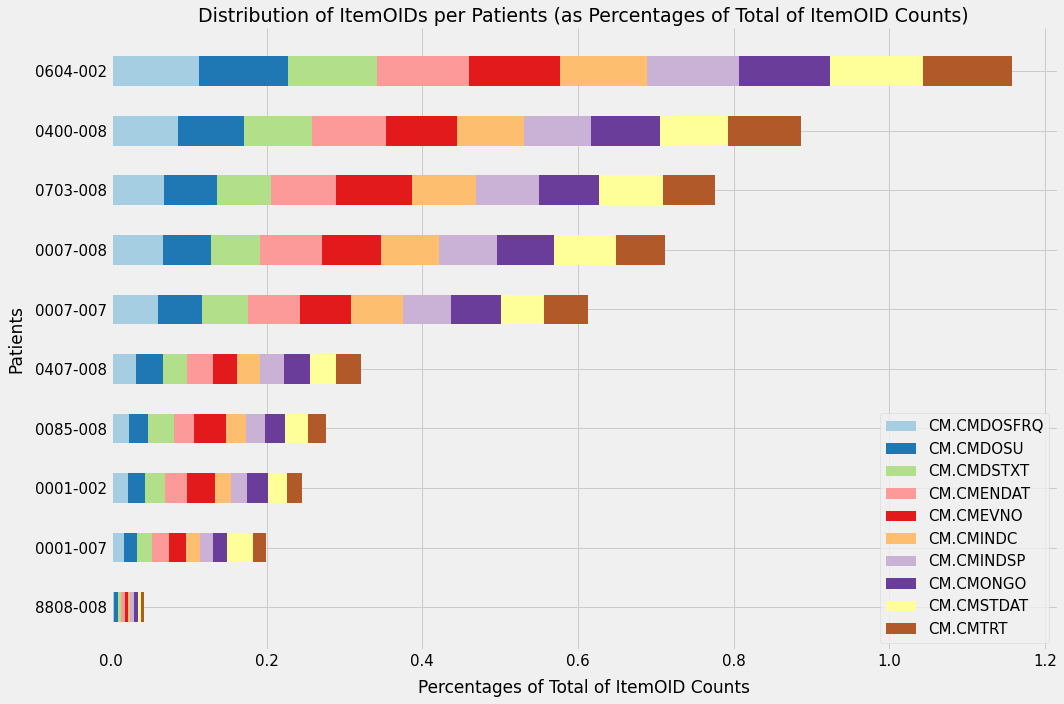

In [78]:
plot_barh(itemoid_subject_bardf, 'ItemOID', in_percent=True, data_path=Path("figures/patients_itemoids_perc.png"))

## 3. Distribution of SiteLocationID per patients

In [79]:
# Filter audit patients
subjects = audit.SubjectID.unique()
subjects.shape

(35,)

In [80]:
site_subject_df = audit[["SubjectID", "SiteLocationID"]]
site_subject_df = site_subject_df.drop_duplicates()
site_subject_df = site_subject_df[site_subject_df.SubjectID.isin(subjects)]
site_subject_df.head()

,SubjectID,SiteLocationID
0,0084-007,080-0084
75,8800-007,080-8800
159,0085-007,080-0085
160,0405-008,080-0405
168,0409-008,080-0409


In [81]:
site_subject_df.shape

(38, 2)

In [82]:
site_subject_df = create_count_df(site_subject_df, "SiteLocationID")
site_subject_df

,SiteLocationID,SubjectID,count
0,080-0001,0001-002,1
1,080-0001,0001-007,1
2,080-0001,0001-008,1
3,080-0007,0007-007,1
4,080-0007,0007-008,1
5,080-0008,0008-008,1
6,080-0072,0072-008,1
7,080-0084,0084-007,1
8,080-0084,0084-008,1
9,080-0085,0085-002,1


In [83]:
site_subject_df = site_subject_df.groupby('SiteLocationID', as_index=False, sort=False).agg({'count': 'sum'})
site_subject_df

,SiteLocationID,count
0,080-0001,3
1,080-0007,2
2,080-0008,1
3,080-0072,1
4,080-0084,2
5,080-0085,3
6,080-0086,1
7,080-0400,1
8,080-0405,1
9,080-0407,1


Save figure:figures/sites_patient_counts.png


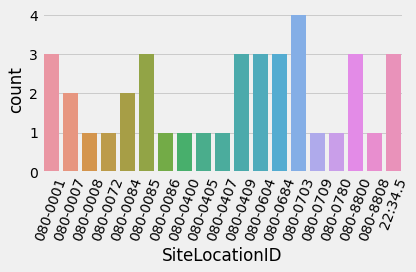

In [84]:
plt.figure(figsize=(6, 4))
sns.barplot(data=site_subject_df, x="SiteLocationID", y="count")
plt.xticks(rotation=70)
plt.tight_layout()
data_path = "figures/sites_patient_counts.png"
print(f"Save figure:{data_path}")
plt.savefig(data_path, dpi=150, facecolor='w', bbox_inches='tight')
plt.show()
plt.close()    

## 4. Distribution of FormOID per Top 10 CM ItemOID 

In [85]:
cols = ['ItemOID']
t = audit[(audit.ItemOID.isin(top_ItemOID_val))]
TableOne(t, columns=cols, groupby='FormOID', pval=False).tabulate(tablefmt = "html")

,,Missing,Overall,CM
n,,,8843,8843
"ItemOID, n (%)",CM.CMDOSFRQ,0,833 (9.4),833 (9.4)
,CM.CMDOSU,,830 (9.4),830 (9.4)
,CM.CMDSTXT,,865 (9.8),865 (9.8)
,CM.CMENDAT,,942 (10.7),942 (10.7)
,CM.CMEVNO,,1004 (11.4),1004 (11.4)
,CM.CMINDC,,880 (10.0),880 (10.0)
,CM.CMINDSP,,874 (9.9),874 (9.9)
,CM.CMONGO,,890 (10.1),890 (10.1)
,CM.CMSTDAT,,887 (10.0),887 (10.0)


## 5. Distribution of Subjects per Top 10 CM ItemOID 

In [86]:
cols = ['ItemOID']
t = audit[(audit.ItemOID.isin(top_ItemOID_val))]
t = t[(t.SubjectID.isin(top_subjectID_val))]
TableOne(t, columns=cols, groupby='SubjectID', pval=False).tabulate(tablefmt = "html")

,,Missing,Overall,0001-002,0001-007,0007-007,0007-008,0085-008,0400-008,0407-008,0604-002,0703-008,8808-008
n,,,4145,195,158,486,564,219,702,255,917,615,34
"ItemOID, n (%)",CM.CMDOSFRQ,0,391 (9.4),17 (8.7),13 (8.2),48 (9.9),53 (9.4),19 (8.7),68 (9.7),26 (10.2),90 (9.8),54 (8.8),3 (8.8)
,CM.CMDOSU,,388 (9.4),18 (9.2),14 (8.9),45 (9.3),49 (8.7),19 (8.7),68 (9.7),27 (10.6),90 (9.8),54 (8.8),4 (11.8)
,CM.CMDSTXT,,401 (9.7),20 (10.3),15 (9.5),47 (9.7),50 (8.9),26 (11.9),69 (9.8),25 (9.8),91 (9.9),55 (8.9),3 (8.8)
,CM.CMENDAT,,442 (10.7),23 (11.8),17 (10.8),53 (10.9),63 (11.2),21 (9.6),75 (10.7),26 (10.2),94 (10.3),66 (10.7),4 (11.8)
,CM.CMEVNO,,458 (11.0),28 (14.4),18 (11.4),51 (10.5),60 (10.6),32 (14.6),72 (10.3),24 (9.4),92 (10.0),78 (12.7),3 (8.8)
,CM.CMINDC,,413 (10.0),16 (8.2),14 (8.9),53 (10.9),59 (10.5),21 (9.6),69 (9.8),24 (9.4),89 (9.7),65 (10.6),3 (8.8)
,CM.CMINDSP,,410 (9.9),17 (8.7),13 (8.2),49 (10.1),59 (10.5),19 (8.7),68 (9.7),24 (9.4),93 (10.1),64 (10.4),4 (11.8)
,CM.CMONGO,,419 (10.1),21 (10.8),14 (8.9),51 (10.5),58 (10.3),20 (9.1),70 (10.0),27 (10.6),93 (10.1),61 (9.9),4 (11.8)
,CM.CMSTDAT,,435 (10.5),19 (9.7),27 (17.1),44 (9.1),63 (11.2),24 (11.0),69 (9.8),26 (10.2),95 (10.4),65 (10.6),3 (8.8)


# More Data Cleaning

## 1. Cleaning Audit and Query Tables

In [87]:
audit.head(3)

,SubjectID,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,EntryDate,ActionCategory,ModifiedDate,SiteLocationID
0,0084-007,TL,TL.TLOTHSP,NaN,"If Other, Specify",NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084
1,0084-007,TL,TL.TLDAT,NaN,Date of image,NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084
2,0084-007,TL,TL.TLMETH,NaN,Method,NaN,8/1/2017,EnteredEmpty,8/3/2018,080-0084


In [88]:
print(audit.shape)
audit['EDate'] = pd.to_datetime(audit['EntryDate'], errors='coerce')
audit['MDate'] = pd.to_datetime(audit['ModifiedDate'], errors='coerce')
df = audit.dropna(subset=['EDate'])
print(df.shape)
df = audit.dropna(subset=['MDate'])
print(df.shape)
audit = df
audit= audit.drop(["EntryDate", "ModifiedDate"],axis=1)
audit = audit.rename({"EDate": "EntryDate", "MDate":"ModifiedDate"},axis=1)

(79234, 10)
(79230, 12)
(79230, 12)


In [89]:
print(query.shape)
query['ODate'] = pd.to_datetime(query['OpenDate'], errors='coerce')
query['ADate'] = pd.to_datetime(query['AnswerDate'], errors='coerce')
query['CDate'] = pd.to_datetime(query['CloseDate'], errors='coerce')
cquery = query.dropna(subset=['ODate'])
print(cquery.shape)
cquery = cquery.dropna(subset=['ADate'])
print(cquery.shape)
cquery = cquery.dropna(subset=['CDate'])
print(cquery.shape)
cquery.drop(["OpenDate","AnswerDate","CloseDate"],axis=1, inplace=True)
cquery = cquery.rename({"ODate":"OpenDate","ADate":"AnswerDate","CDate":"CloseDate"},axis=1)

(5795, 11)
(5761, 14)
(4942, 14)
(4942, 14)


In [90]:
cquery.head()

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate
0,0007-008,LNB,Lymph Node Biopsy,LNB.LNBYN,Was lymph node biopsy performed?,N,Please update to No. Not done per Dr. Byrd as...,Corrected,2015-11-20,2016-01-27,2016-02-18
1,0007-008,LNB,Lymph Node Biopsy,LNB.LNBYN,Was lymph node biopsy performed?,N,Please update to No. Not done per Dr. Byrd as...,Corrected,2015-11-20,2016-01-27,2016-02-18
2,0007-008,TL,Tumor Assessment - Target Lesions,TL.TLYN,Was Target Lesion Assessment Performed?,Y,"Please complete Target, Non Target and Spleen/...",Source Document is Tumor Measurement Form,2015-11-20,2015-12-03,2016-02-18
7,0007-008,PC2,Pharmacokinetic Blood Sample <predoseonly/>,PC2.PCEXDAT,Date of dose prior to PK sampling,13-Nov-15,Please complete per source.,Corrected,2015-11-20,2015-12-01,2016-02-18
8,0007-008,PC2,Pharmacokinetic Blood Sample <predoseonly/>,PC2.PCEXDAT,Date of dose prior to PK sampling,13-Nov-15,Please complete per source.,Corrected,2015-11-20,2015-12-01,2016-02-18


In [91]:
nquery = cquery.copy()
nquery['numItemValue'] = pd.to_numeric(nquery['ItemValue'], errors='coerce')
nquery = nquery.dropna(subset=['numItemValue'])
nquery.shape

(1557, 12)

## 2. Top 10 Results on Numerical Query Table

In [92]:
top_subject_nquery = get_top_n_percent(nquery, "SubjectID", top=10)
top_subject_nquery

,Overall,perc
SubjectID,,
0085-008,173,11.11
0001-007,116,7.45
0007-007,95,6.10
0085-007,80,5.14
0001-002,79,5.07
0007-008,76,4.88
0703-008,70,4.50
0407-008,70,4.50
0409-008,68,4.37


In [93]:
top_itemLabel = get_top_n_percent(nquery, "ItemLabel", top=10)
top_itemLabel

,Overall,perc
ItemLabel,,
Prescribed dose,95,6.10
Dose,80,5.14
Lymphocytes (absolute count),66,4.24
Event number,63,4.05
Neutrophils Absolute Count,61,3.92
RBC Count,49,3.15
Band neutrophils (%),43,2.76
Monocytes (absolute count),40,2.57
Neutrophils (%),37,2.38


In [94]:
get_top_n_percent(nquery, "ItemValue", top=10)

,Overall,perc
ItemValue,,
0,207,13.29
1,114,7.32
60,97,6.23
2,74,4.75
3,30,1.93
5,26,1.67
4,22,1.41
66,15,0.96
16,14,0.90


In [95]:
nquery.query("ItemLabel == 'Event number'").head(5)

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
1145,0085-007,CM,Concomitant Medication,CM.CMEVNO,Event number,5,"The only item on the medical hx eCRF is ""Diabe...",Updated,2016-11-03,2016-12-01,2016-12-14,5.0
2457,0007-007,CM,Concomitant Medication,CM.CMEVNO,Event number,9,Data is recorded as '9'. If the number corresp...,updated,2016-06-14,2016-06-16,2016-06-23,9.0
2458,0084-008,CM,Concomitant Medication,CM.CMEVNO,Event number,16,Indication is recorded as ‘Adverse event’. How...,corrected,2016-06-14,2016-08-18,2016-09-06,16.0
2459,0084-008,CM,Concomitant Medication,CM.CMEVNO,Event number,16,Indication is recorded as ‘Adverse event’. How...,updated,2016-06-14,2016-08-18,2016-09-06,16.0
2460,0084-008,CM,Concomitant Medication,CM.CMEVNO,Event number,7,Indication is recorded as ‘Adverse event’. How...,updated,2016-06-14,2016-08-18,2016-09-06,7.0


In [96]:
nquery.query("ItemLabel == 'Dose'").head(5)

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
265,0604-008,CM,Concomitant Medication,CM.CMDSTXT,Dose,200,Re-Query: Previous query response states “dose...,DOSE IS CORRECT AT 200 ML AS PER SOURCE UPDATE...,2015-08-24,2015-08-24,2015-08-25,200.0
551,0604-008,CM,Concomitant Medication,CM.CMDSTXT,Dose,60,Enter 60mg. Review and amend as applicable.,updated,2015-11-05,2015-11-05,2016-01-27,60.0
589,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,AE # 16 referenced below- if you go to the AE ...,Updated,2017-06-02,2017-06-12,2017-06-12,0.0
590,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,AE # 16 referenced below- if you go to the AE ...,Updated,2017-06-02,2017-06-12,2017-06-12,0.0
591,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,AE # 16 referenced below- if you go to the AE ...,Updated,2017-06-02,2017-06-12,2017-06-12,0.0


In [97]:
top_FormOID_nquery = get_top_n_percent(nquery, "FormOID", top=10)
top_FormOID_nquery

,Overall,perc
FormOID,,
LB_HEME,592,38.02
LB_CHEM,179,11.50
EX,178,11.43
AE,97,6.23
LB_CHEM2,80,5.14
CM,75,4.82
LB_COAG,44,2.83
LB_UM,40,2.57
VS,36,2.31


In [98]:
top_FormOID_nquery_val = top_FormOID_nquery.index.values
top_FormOID_nquery_val

array(['LB_HEME', 'LB_CHEM', 'EX', 'AE', 'LB_CHEM2', 'CM', 'LB_COAG',
       'LB_UM', 'VS', 'TL'], dtype=object)

In [99]:
t = nquery[(nquery["FormOID"].isin(top_FormOID_nquery_val)) & (nquery["ItemLabel"] == "Dose")]
TableOne(t, columns=["FormOID"], groupby='ItemLabel', pval=False).tabulate(tablefmt = "html")

,,Missing,Overall,Dose
n,,,55,55
"FormOID, n (%)",CM,0,11 (20.0),11 (20.0)
,EX,,44 (80.0),44 (80.0)


In [100]:
nquery.query("FormOID == 'EX' & ItemLabel == 'Dose'").head(3)

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
589,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,AE # 16 referenced below- if you go to the AE ...,Updated,2017-06-02,2017-06-12,2017-06-12,0.0
590,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,AE # 16 referenced below- if you go to the AE ...,Updated,2017-06-02,2017-06-12,2017-06-12,0.0
591,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,AE # 16 referenced below- if you go to the AE ...,Updated,2017-06-02,2017-06-12,2017-06-12,0.0


In [101]:
t = nquery[(nquery["FormOID"].isin(top_FormOID_nquery_val)) & (nquery["ItemLabel"] == "Lymphocytes (absolute count)")]
TableOne(t, columns=["FormOID"], groupby='ItemLabel', pval=False).tabulate(tablefmt = "html")

,,Missing,Overall,Lymphocytes (absolute count)
n,,,66,66
"FormOID, n (%)",LB_HEME,0,66 (100.0),66 (100.0)


In [102]:
t = nquery[(nquery["FormOID"].isin(top_FormOID_nquery_val)) & (nquery["ItemLabel"] == "Neutrophils Absolute Count")]
TableOne(t, columns=["FormOID"], groupby='ItemLabel', pval=False).tabulate(tablefmt = "html")

,,Missing,Overall,Neutrophils Absolute Count
n,,,61,61
"FormOID, n (%)",LB_HEME,0,61 (100.0),61 (100.0)


In [103]:
get_top_n_percent(nquery.query("ItemLabel == 'Dose'"), "SubjectID",top=5)

,Overall,perc
SubjectID,,
0001-007,18,22.50
0072-008,16,20.00
0085-007,12,15.00
0001-002,11,13.75
0085-002,5,6.25


## 3. Investigation of `60` Prescribed Dose value

In [104]:
nquery.query("ItemValue == '60'").FormOID.unique()

array(['EX', 'CM', 'LB_CHEM'], dtype=object)

In [105]:
nquery.query("ItemValue == '60' & FormOID=='EX'").head(3)

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
437,0084-007,EX,Study Drug Dosing,EX.EXPDOS,Prescribed dose,60,"Per EOT page, the subject discontinued treatme...",done,2017-05-26,2017-05-30,2017-05-31,60.0
448,0085-008,EX,Study Drug Dosing,EX.EXPDOS,Prescribed dose,60,Log line 42 is blank. Please inactivate the lo...,Updated,2017-05-26,2017-06-12,2017-06-13,60.0
450,0405-008,EX,Study Drug Dosing,EX.EXPDOS,Prescribed dose,60,Re-query: Response states updated. However Wee...,updated,2017-05-29,2017-06-05,2017-06-15,60.0


In [106]:
nquery.query("ItemValue == '60' & FormOID=='CM'").head(3)

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
551,0604-008,CM,Concomitant Medication,CM.CMDSTXT,Dose,60,Enter 60mg. Review and amend as applicable.,updated,2015-11-05,2015-11-05,2016-01-27,60.0


In [107]:
nquery.query("ItemValue == '60' & FormOID=='LB_CHEM'").head(3)

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
3637,0409-008,LB_CHEM,Chemistry (complete),LB_CHEM.UREA,Urea,60,Please update Clinical significance.,updated,2016-06-23,2016-06-23,2016-06-28,60.0
4947,0085-008,LB_CHEM,Chemistry (complete),LB_CHEM.ALKPH,Alkaline Phosphatase,60,"per source, ""60""",Updated,2015-12-07,2015-12-08,2015-12-15,60.0


# `LB_CHEM.UREA` Patient Event Flow

In [108]:
qpatient = nquery.query("(SubjectID == '0001-007')")
qpatient = qpatient.drop("SubjectID", axis=1)
qpatient = qpatient.query("ItemOID == 'LB_CHEM.UREA'")
qpatient = qpatient.sort_values(by='OpenDate', ascending=True)
qpatient[['OpenDate', 'CloseDate', 'ItemValue', 'QueryValue', 'QueryResponse']]

,OpenDate,CloseDate,ItemValue,QueryValue,QueryResponse
491,2015-11-10,2015-11-13,5,The lab parameter is blank. If it was not perf...,updated
5502,2016-02-23,2016-04-21,5.4,Was serum chemistry sample collected? is Yes. ...,NaN
4040,2016-03-01,2016-04-21,6.1,"Data is not recorded. If not done, Please upda...",Updated
3867,2016-03-29,2016-03-30,5.4,5.4 on 5/29/15 per source. Please update - Th...,updated
3868,2016-03-29,2016-03-30,6.1,6.1 per source. Please complete. This is the...,-
3011,2017-01-19,2017-01-24,6.1,Please assess if CS or NCS from the drop down ...,Updated
3016,2017-01-19,2017-01-24,5.4,Please assess if CS or NCS from the drop down ...,Updated


In [109]:
audit_patient = audit.query("SubjectID == '0001-007'")
audit_patient = audit_patient.drop("SubjectID", axis=1)
audit_patient = audit_patient.query("ItemOID == 'LB_CHEM.UREA'")
audit_patient = audit_patient.sort_values(by='EntryDate', ascending=True)
audit_patient[['EntryDate', 'ModifiedDate', 'ItemValue', 'ActionCategory']]

,EntryDate,ModifiedDate,ItemValue,ActionCategory
72678,2015-06-18,2018-08-03,NaN,EnteredEmpty
77043,2015-06-18,2018-08-03,NaN,EnteredEmpty
59114,2015-08-14,2018-08-03,NaN,EnteredEmpty
49932,2015-09-17,2018-08-03,NaN,EnteredWithMissingCode
49552,2015-09-18,2018-08-03,NaN,EnteredEmpty
40367,2015-11-10,2018-08-03,5,EnteredWithChangeCode
16286,2016-03-29,2018-08-03,5.4,EnteredWithChangeCode
16287,2016-03-29,2018-08-03,6.1,EnteredWithChangeCode


# Average, standard deviation of Number of Days between Open and Answer Date Queries

In [110]:
delta_dates = cquery.copy()
delta_dates['days'] = (delta_dates.AnswerDate - delta_dates.OpenDate).dt.days
delta_dates.describe()

,days
count,4942.000000
mean,41.671388
std,63.791758
min,0.000000
25%,1.000000
50%,12.000000
75%,55.000000
max,514.000000


In [111]:
delta_dates.query('days == 514')

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,days
1160,0086-008,SLA,Spleen/Liver Assessment,SLA.SLADAT,Date of assessment,24-Oct-14,Pls complete.Thanks,done,2015-05-22,2016-10-17,2016-10-25,514
1161,0086-008,SLA,Spleen/Liver Assessment,SLA.SLADAT,Date of assessment,24-Oct-14,Pls complete.Thanks,done,2015-05-22,2016-10-17,2016-10-25,514
1162,0086-008,TL,Tumor Assessment - Target Lesions,TL.TLYN,Was Target Lesion Assessment Performed?,Y,Pls complete. Thanks.,done,2015-05-22,2016-10-17,2016-10-25,514


# Distribution of `Dose` for 'CM' and `EX` formOIDS

In [112]:
output_notebook()

def make_plot(title, hist, edges):
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
    p.y_range.start = 0
    p.xaxis.axis_label = 'Count'
    p.yaxis.axis_label = 'Percent'
    p.grid.grid_line_color="white"
    return p

def make_numeric_label_plot(df: pd.DataFrame, labels: List[str]) -> None:
    t = df.copy()
    plot_list = []
    for label in labels:
        lt = t[t["ItemLabel"] == label]
        hist, edges = np.histogram(lt['numItemValue'], density=False, bins=50)
        percent = [i/sum(hist)*100 for i in hist]
        plot_list.append(make_plot(label, hist, edges))

    bt = show(gridplot(plot_list, ncols=2, width=400, height=200, toolbar_location=None,), notebook_handle=True)
    push_notebook(handle=bt)

Loading BokehJS ...

In [113]:
CM_df = nquery[nquery.FormOID == "CM"]
make_numeric_label_plot(CM_df, ["Dose"])

In [114]:
CM_df.head()

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
265,0604-008,CM,Concomitant Medication,CM.CMDSTXT,Dose,200,Re-Query: Previous query response states “dose...,DOSE IS CORRECT AT 200 ML AS PER SOURCE UPDATE...,2015-08-24,2015-08-24,2015-08-25,200.0
551,0604-008,CM,Concomitant Medication,CM.CMDSTXT,Dose,60,Enter 60mg. Review and amend as applicable.,updated,2015-11-05,2015-11-05,2016-01-27,60.0
1145,0085-007,CM,Concomitant Medication,CM.CMEVNO,Event number,5,"The only item on the medical hx eCRF is ""Diabe...",Updated,2016-11-03,2016-12-01,2016-12-14,5.0
1714,0007-008,CM,Concomitant Medication,CM.CMONGO,Ongoing,1,"This is marked as Ongoing; however, AE #38 had...",also used as prophylaxis,2017-03-31,2017-04-17,2017-05-16,1.0
1811,0085-002,CM,Concomitant Medication,CM.CMDSTXT,Dose,40,dose stated on source is 40MEQ=2tabs,Updated,2016-09-08,2016-09-21,2016-09-21,40.0


In [115]:
EX_df = nquery[nquery.FormOID == "EX"]
make_numeric_label_plot(EX_df, ["Dose"])

In [116]:
def plot_numeric_values(df: pd.DataFrame, x: str, y: str, label: str, /,*, rename_x_label: str=None) -> None:
    sns.set(style='whitegrid', font_scale=1.3)
    t = df.copy()
    t = t[t["ItemLabel"] == label]
    t = pd.concat([t[f'{x}'], t[f'{y}']], axis=1)
    f, ax = plt.subplots(figsize=(6, 5))
    if rename_x_label is not None:
        t.rename({"numItemValue":rename_x_label}, axis=1, inplace=True)
        fig = sns.boxplot(x = f'{rename_x_label}', y=f'{x}', data = t)
    else:
        t.rename({"numItemValue":label}, axis=1, inplace=True)
        fig = sns.boxplot(x = f'{label}', y=f'{x}', data = t)
    plt.xticks(rotation=45)
    plt.show()
    plt.close()    

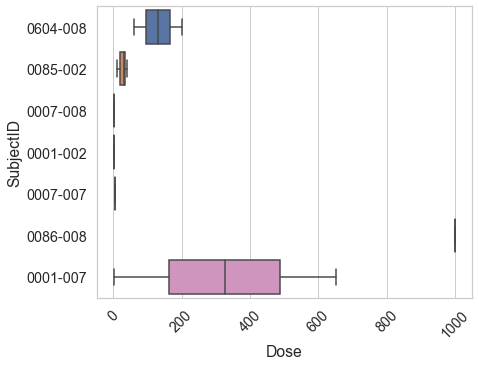

In [117]:
plot_numeric_values(CM_df, "SubjectID", "numItemValue", "Dose")

In [118]:
CM_df[CM_df.SubjectID == '0001-007']

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
5704,0001-007,CM,Concomitant Medication,CM.CMDSTXT,Dose,650,Conmed source log states 650 mg. Please update.,Updated,2016-01-05,2016-01-05,2016-03-29,650.0
5705,0001-007,CM,Concomitant Medication,CM.CMDSTXT,Dose,2,Conmed source log states 2 mg PO. Please update.,Updated,2016-01-05,2016-01-05,2016-03-29,2.0


In [119]:
CM_df[CM_df.SubjectID == '0604-008']

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
265,0604-008,CM,Concomitant Medication,CM.CMDSTXT,Dose,200,Re-Query: Previous query response states “dose...,DOSE IS CORRECT AT 200 ML AS PER SOURCE UPDATE...,2015-08-24,2015-08-24,2015-08-25,200.0
551,0604-008,CM,Concomitant Medication,CM.CMDSTXT,Dose,60,Enter 60mg. Review and amend as applicable.,updated,2015-11-05,2015-11-05,2016-01-27,60.0


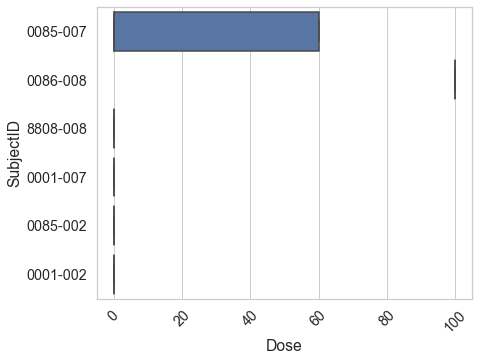

In [120]:
plot_numeric_values(EX_df, "SubjectID", "numItemValue", "Dose")

In [121]:
EX_df[EX_df.SubjectID == '0086-008']

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
1158,0086-008,EX,Study Drug Dosing,EX.EXDOSE,Dose,100,"Can you pls check. Per protocol, pt should hav...","per source: ""based on BSA patients dose is 100...",2015-05-22,2015-06-03,2016-10-25,100.0
1159,0086-008,EX,Study Drug Dosing,EX.EXDOSE,Dose,100,"Can you pls check. Per protocol, pt should hav...","per source: ""based on BSA patients dose is 100...",2015-05-22,2015-06-03,2016-10-25,100.0


In [122]:
EX_df[EX_df.SubjectID == '0085-007']

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
589,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,AE # 16 referenced below- if you go to the AE ...,Updated,2017-06-02,2017-06-12,2017-06-12,0.0
590,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,AE # 16 referenced below- if you go to the AE ...,Updated,2017-06-02,2017-06-12,2017-06-12,0.0
591,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,AE # 16 referenced below- if you go to the AE ...,Updated,2017-06-02,2017-06-12,2017-06-12,0.0
592,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,AE # 16 referenced below- if you go to the AE ...,Updated,2017-06-02,2017-06-12,2017-06-12,0.0
1206,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,"Since the dose is unknown, update '0' to 'UNK'.",updated,2017-02-26,2017-03-06,2017-03-09,0.0
1239,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,"Since the dose is unknown, update '0' to 'UNK'.",updated,2017-02-26,2017-03-06,2017-03-09,0.0
1240,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,"Since the dose is unknown, update '0' to 'UNK'.",updated,2017-02-26,2017-03-06,2017-03-09,0.0
1241,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,0,"Since the dose is unknown, update '0' to 'UNK'.",updated,2017-02-26,2017-03-06,2017-03-09,0.0
1979,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,60,"If this dose was taken, how then do you have a...",corrected,2017-05-19,2017-05-23,2017-05-23,60.0
1980,0085-007,EX,Study Drug Dosing,EX.EXDOSE,Dose,60,"If this dose was taken, how then do you have a...",corrected,2017-05-19,2017-05-23,2017-05-23,60.0


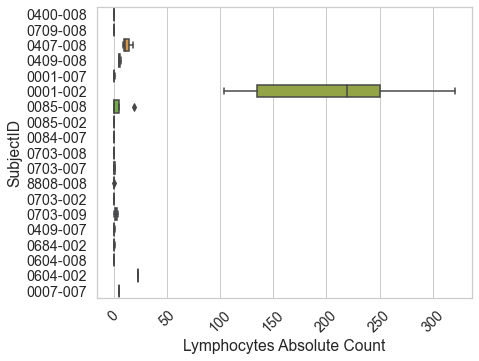

In [123]:
plot_numeric_values(nquery, "SubjectID", "numItemValue", "Lymphocytes (absolute count)", 
                    rename_x_label="Lymphocytes Absolute Count")

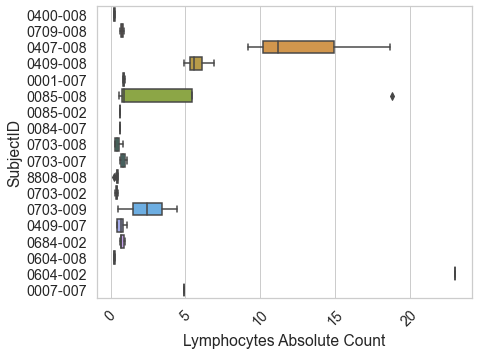

In [124]:
df_no_001_002 = nquery[nquery["SubjectID"] != '0001-002'].copy()
plot_numeric_values(df_no_001_002, "SubjectID", "numItemValue", "Lymphocytes (absolute count)",
                    rename_x_label="Lymphocytes Absolute Count")

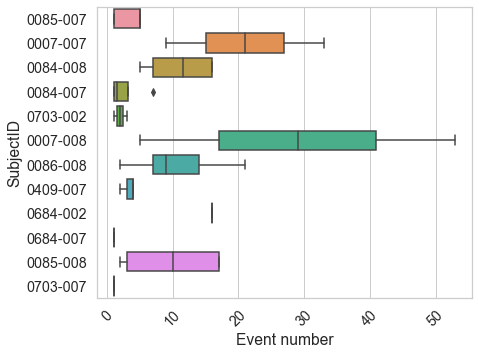

In [125]:
plot_numeric_values(nquery, "SubjectID", "numItemValue", "Event number")

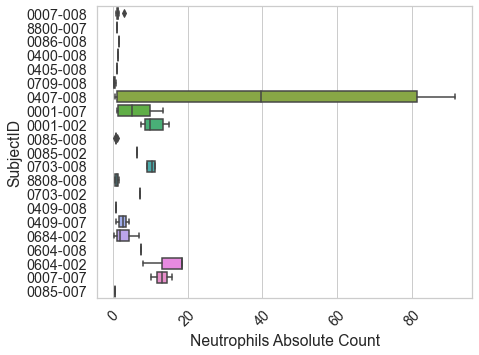

In [126]:
plot_numeric_values(nquery, "SubjectID", "numItemValue", "Neutrophils Absolute Count")

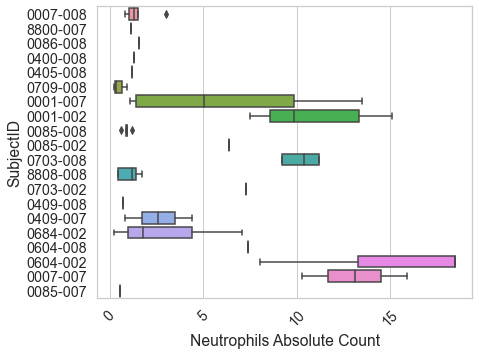

In [127]:
df_no_0407_008 = nquery[nquery["SubjectID"] != '0407-008'].copy()
plot_numeric_values(df_no_0407_008, "SubjectID", "numItemValue", "Neutrophils Absolute Count")

# Top 10 `QueryValue`

In [128]:
top_QueryValue  = get_top_n_percent(query, "QueryValue", top=10)
top_QueryValue

,Overall,perc
QueryValue,,
Please update Clinical significance.,196,3.40
"Please assess if CS or NCS from the drop down menu. If CS, be sure to add to the AE page.",163,2.83
Please assess if CS or NCS from the drop down menu.,158,2.74
"Please select the correct local lab name from the drop down menu on top of this CRF and the lab normal ranges will populate. (Only Clinically Significant fields will auto-populate under the test name for an out-of-range value, be sure to select CS or NCS from the drop down menu.)",157,2.72
Please complete the form.,117,2.03
"Data is not recorded. If not done, Please update data as ‘ND-Not done’ in this data field, else clarify.",98,1.70
Please assess if CS or NCS from the drop down menu. If CS be sure to enter information on the AE page.,76,1.32
Please assess if CS or NCS from drop down.,70,1.21
"Re-Query: Previous query response states ‘not done’. However If not performed, Kindly update ‘ND – Not done’ in this data field. Else clarify",63,1.09


# Distribution of Query Values per Query Responses

In [129]:
t = query[query["QueryValue"].isin(top_QueryValue.index.values)]
TableOne(t, columns=["QueryResponse"], groupby='QueryValue', pval=False).tabulate(tablefmt = "html")

,,Missing,Overall,"Data is not recorded. If not done, Please update data as ‘ND-Not done’ in this data field, else clarify.","For coding purposes, please report if there is a term linked with the reported other. Please update event description as needed.",Please assess if CS or NCS from drop down.,Please assess if CS or NCS from the drop down menu.,Please assess if CS or NCS from the drop down menu. If CS be sure to enter information on the AE page.,"Please assess if CS or NCS from the drop down menu. If CS, be sure to add to the AE page.",Please complete the form.,"Please select the correct local lab name from the drop down menu on top of this CRF and the lab normal ranges will populate. (Only Clinically Significant fields will auto-populate under the test name for an out-of-range value, be sure to select CS or NCS from the drop down menu.)",Please update Clinical significance.,"Re-Query: Previous query response states ‘not done’. However If not performed, Kindly update ‘ND – Not done’ in this data field. Else clarify"
n,,,1147,98,49,70,158,76,163,117,157,196,63
"QueryResponse, n (%)",OK,89,42 (4.0),15 (18.8),nan (nan),,,1 (1.4),,,,14 (7.1),12 (20.3)
,Updated,,204 (19.3),17 (21.2),nan (nan),46 (65.7),65 (41.4),,23 (14.6),7 (6.1),,46 (23.5),
,corrected,,7 (0.7),7 (8.8),nan (nan),,,,,,,,
,"data corrected, thank you",,47 (4.4),11 (13.8),nan (nan),,,,,15 (13.2),21 (14.0),,
,data updated,,12 (1.1),12 (15.0),nan (nan),,,,,,,,
,done,,296 (28.0),2 (2.5),nan (nan),,10 (6.4),49 (66.2),86 (54.4),27 (23.7),93 (62.0),29 (14.8),
,none reported,,1 (0.1),1 (1.2),nan (nan),,,,,,,,
,not done entered,,8 (0.8),7 (8.8),nan (nan),,,,,,,,1 (1.7)
,ok,,31 (2.9),1 (1.2),nan (nan),,20 (12.7),1 (1.4),1 (0.6),,,,8 (13.6)


# Finding Outliers

In [130]:
itemOID_top = get_top_n_percent(audit, "ItemOID", top=10)
itemOID_top.head(10)

,Overall,perc
ItemOID,,
CM.CMEVNO,1004,1.27
CM.CMENDAT,942,1.19
CM.CMONGO,890,1.12
CM.CMSTDAT,887,1.12
CM.CMINDC,880,1.11
CM.CMINDSP,874,1.10
CM.CMDSTXT,865,1.09
CM.CMTRT,838,1.06
CM.CMDOSFRQ,833,1.05


In [131]:
df = audit.copy()
df["ItemValue"] = pd.to_numeric(df["ItemValue"], errors='coerce')
df = df.dropna(subset=['ItemValue'])
ct = pd.crosstab(df.ItemOID, df.ItemValue) 
ct = ct[ct.any(axis=1)]
ct = ct.loc[:, (ct!=0).any(axis=0)]

In [132]:
ct = ct[ct.sum(axis=1) > 500]
ct["sum_val"] = ct.sum(axis=1)

In [133]:
ct.sort_values(by="sum_val", ascending=False).index

Index(['CM.CMONGO', 'CM.CMDSTXT', 'AE.AEACN1', 'AE.AEONGO', 'AE.AEACN2', 'AE.AETOXGR', 'AE.AESHOSP', 'AE.AEACN3'], dtype='object', name='ItemOID')

In [134]:
audit[audit.ItemOID == 'AE.AETOXGR'].head(3)

,SubjectID,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,ActionCategory,SiteLocationID,EntryDate,ModifiedDate
284,0400-008,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,4,Entered,080-0400,2017-07-05,2018-08-03
698,0400-008,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,4,Entered,080-0400,2017-05-30,2018-08-03
716,0400-008,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,3,Entered,080-0400,2017-05-30,2018-08-03


In [135]:
audit[audit.ItemOID == 'AE.AETOXGR'].ItemValue.unique()

array(['4', '3', '5', '2', '1', nan], dtype=object)

In [136]:
top_itemOID = get_top_n_percent(audit, "ItemOID", top=10)
top_itemOID

,Overall,perc
ItemOID,,
CM.CMEVNO,1004,1.27
CM.CMENDAT,942,1.19
CM.CMONGO,890,1.12
CM.CMSTDAT,887,1.12
CM.CMINDC,880,1.11
CM.CMINDSP,874,1.10
CM.CMDSTXT,865,1.09
CM.CMTRT,838,1.06
CM.CMDOSFRQ,833,1.05


In [137]:
top_itemOID_nquery = get_top_n_percent(nquery, "ItemOID", top=10)
top_itemOID_nquery

,Overall,perc
ItemOID,,
EX.EXPDOS,95,6.10
LB_HEME.LYMPHABS,66,4.24
CM.CMEVNO,63,4.05
LB_HEME.NEUTABS,61,3.92
LB_HEME.RBC,49,3.15
EX.EXDOSE,44,2.83
LB_HEME.BANDNEUT,43,2.76
LB_HEME.MONOABS,40,2.57
LB_HEME.NEUT,37,2.38


## 1. Analysis of `LB_HEME.LYMPHABS`

In [138]:
data_df = audit.query("ItemOID == 'LB_HEME.LYMPHABS'")
data_df.shape

(171, 10)

In [139]:
data_df.head()

,SubjectID,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,ActionCategory,SiteLocationID,EntryDate,ModifiedDate
246,0400-008,LB_HEME,LB_HEME.LYMPHABS,NaN,Lymphocytes (absolute count),0.2,Entered,080-0400,2017-07-04,2018-08-03
3607,0405-008,LB_HEME,LB_HEME.LYMPHABS,NaN,Lymphocytes (absolute count),1.29,EnteredWithChangeCode,080-0405,2016-12-12,2018-08-03
3853,0084-007,LB_HEME,LB_HEME.LYMPHABS,NaN,Lymphocytes (absolute count),0.6,EnteredWithChangeCode,080-0084,2016-11-01,2018-08-03
4120,8808-008,LB_HEME,LB_HEME.LYMPHABS,NaN,Lymphocytes (absolute count),NaN,EnteredEmpty,080-8808,2016-10-19,2018-08-03
5783,8808-008,LB_HEME,LB_HEME.LYMPHABS,NaN,Lymphocytes (absolute count),0.46,Entered,080-8808,2016-08-26,2018-08-03


In [140]:
data_df["ItemValue"] = pd.to_numeric(data_df["ItemValue"], errors='coerce')
data_df = data_df.dropna(subset=['ItemValue'])
data_df.describe()

/var/folders/46/4k3zbt7527qgn5sdg7lzzxh80000gn/T/ipykernel_56868/3142693369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["ItemValue"] = pd.to_numeric(data_df["ItemValue"], errors='coerce')


,ItemValue
count,149.000000
mean,13.266040
std,49.806652
min,0.100000
25%,0.600000
50%,1.000000
75%,1.900000
max,321.310000


<AxesSubplot:xlabel='ItemValue', ylabel='Count'>

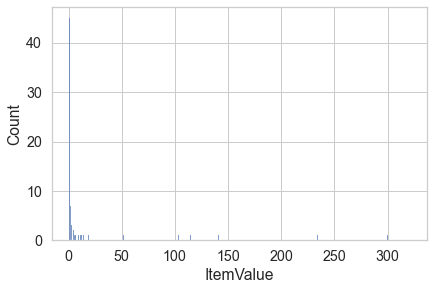

In [141]:
sns.histplot(data_df['ItemValue'])

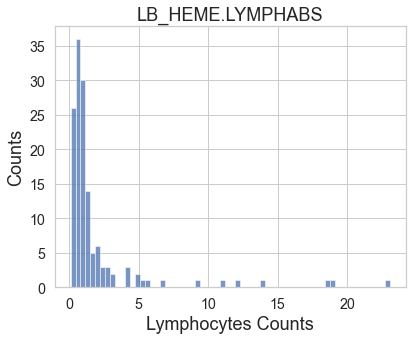

In [142]:
df = data_df.query("ItemValue < 50")
_, ax = plt.subplots(1, 1, figsize=(6, 5))
ax = sns.histplot(df.ItemValue, ax=ax, palette="Set3")
ax.set_xlabel("Lymphocytes Counts", fontsize=18)
ax.set_ylabel("Counts", fontsize=18)
ax.set_title("LB_HEME.LYMPHABS", fontsize=18)
plt.tight_layout()
plt.savefig(Path("figures/lymphocytes_counts_less_50.png"), dpi=150, facecolor='w', bbox_inches='tight')
plt.show()
plt.close()

<AxesSubplot:xlabel='ItemValue', ylabel='Count'>

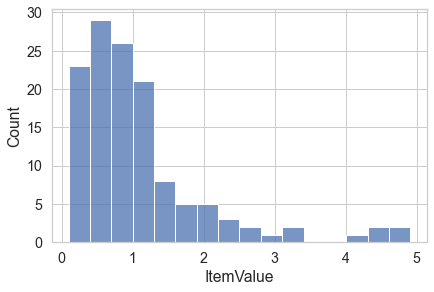

In [143]:
df = df.query("ItemValue < 5")
sns.histplot(df.ItemValue)

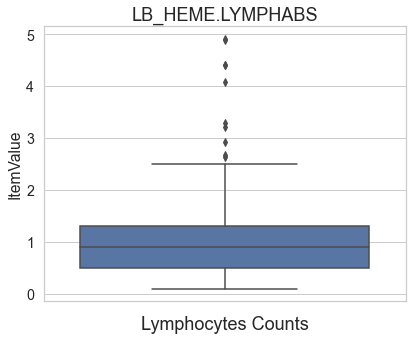

In [144]:
_, ax = plt.subplots(1, 1, figsize=(6, 5))
ax = sns.boxplot(y=df.ItemValue)
ax.set_xlabel("Lymphocytes Counts", fontsize=18)
ax.set_title("LB_HEME.LYMPHABS", fontsize=18)
plt.tight_layout()
plt.savefig(Path("figures/lymphocytes_counts_less_5.png"), dpi=150, facecolor='w', bbox_inches='tight')
plt.show()
plt.close()

## 2. Detecting `LB_HEME.LYMPHABS` outliers

In [145]:
vals = data_df['ItemValue'].values
vals = vals.reshape(-1, 1)
vals.shape

(149, 1)

In [146]:
#vals

We do not have so many values to use for a supervised methodology; we prefer to use probabilistic unsupervised models.
* We first start by identifying outliers as being by default on z-score scale 3.5 away from the median.Conventional Z scores calculated using the mean and SD are sensitive to outliers in the data. An alternative is to use the median and median-absolute-deviation (MAD): **The formula for MAD is: MAD = median(| x - median(x)|)**
* We propose an alternative approach using `ECOD (Empirical-Cumulative-distribution-based Outlier Detection)`. ECOD is a parameter-free, highly interpretable outlier detection algorithm based on empirical CDF function.

Reference:`Zheng Li, Yue Zhao, Xiyang Hu, Nicola Botta, Cezar Ionescu, and H. George Chen. Ecod: unsupervised outlier detection using empirical cumulative distribution functions. IEEE Transactions on Knowledge and Data Engineering, 2022.`(https://arxiv.org/pdf/2201.00382.pdf)



In [147]:
from dataclasses import dataclass

@dataclass(init=False)
class MADClassifier:
    threshold_: float = 3.5
    median: float
    
    def fit(self, X):
        """Fit detector.

        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The input samples. Note that `n_features` must equal 1.
        Returns
        -------
        self : object
            Fitted estimator.
        """
        self.median = None  # reset median after each call
        self.median_diff = None  # reset median_diff after each call
        self.decision_scores_ = self.decision_function(X)
        return self
            
    def _mad(self, X)  -> np.ndarray:
        """
        Apply the robust median absolute deviation (MAD)
        to measure the distances of data points from the median.

        Returns
        -------
        numpy array containing modified Z-scores of the observations.
        The greater the score, the greater the outlierness.
        """
        obs = np.reshape(X, (-1, 1))
        # `self.median` will be None only before `fit()` is called
        self.median = np.nanmedian(obs) if self.median is None else self.median
        diff = np.abs(obs - self.median)
        self.median_diff = np.nanmedian(diff) if self.median_diff is None else self.median_diff
        return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff))     
            
    def decision_function(self, X) -> np.ndarray:
        """Predict raw anomaly score of X using the fitted detector.

        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)

        Returns
        -------
        anomaly_scores : numpy array of shape (n_samples,)
            The anomaly score of the input samples.
        """
        return self._mad(X)         
    

    def predict(self, X) -> np.ndarray:
        """Predict if a particular sample is an outlier or not.
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        outlier_labels : numpy array of shape (n_samples,)
            For each observation, tells whether
            it should be considered as an outlier according to the
            fitted model. 0 stands for inliers and 1 for outliers.
        """

        pred_score = self.decision_function(X)
        prediction = (pred_score > self.threshold_).astype('int').ravel()
        return prediction    

In [148]:
from scipy.stats import skew
from statsmodels.distributions.empirical_distribution import ECDF

@dataclass
class ECODClassifier:
    contamination: float = 0.1
    
    @staticmethod
    def ecdf(X) -> float:
        """Calculated the empirical CDF of a given dataset.
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The training dataset.
        Returns
        -------
        ecdf(X) : float
            Empirical CDF of X
        """
        ecdf = ECDF(X)
        return ecdf(X)    
    
    def fit(self, X):
        """Fit detector.
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        self : object
            Fitted estimator.
        """
        self.decision_scores_ = self.decision_function(X)
        self._process_decision_scores()
        return self
    
    def decision_function(self, X)  -> np.ndarray:
        """Predict raw anomaly score of X using the fitted detector.
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
        Returns
        -------
        anomaly_scores : numpy array of shape (n_samples,)
            The anomaly score of the input samples.
        """
        self.U_l = -1 * np.log(np.apply_along_axis(ECODClassifier.ecdf, 0, X))
        self.U_r = -1 * np.log(np.apply_along_axis(ECODClassifier.ecdf, 0, -X))

        skewness = np.sign(skew(X, axis=0))
        self.U_skew = self.U_l * -1 * np.sign(
            skewness - 1) + self.U_r * np.sign(skewness + 1)

        tmp = np.maximum(self.U_l, self.U_r)
        tmp = np.maximum(self.U_skew, tmp)

        decision_scores_ = tmp.sum(axis=1)
        return decision_scores_.ravel()
    
    def _process_decision_scores(self) -> None:
        """Internal function to calculate threshold_: used to decide the binary label
        Returns
        -------
        self
        """
        self.threshold_ = np.percentile(self.decision_scores_, 100 * (1 - self.contamination))
            
    def predict(self, X)  -> np.ndarray:
        """Predict if a particular sample is an outlier or not.
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        outlier_labels : numpy array of shape (n_samples,)
            For each observation, tells whether
            it should be considered as an outlier according to the
            fitted model. 0 stands for inliers and 1 for outliers.
        """

        pred_score = self.decision_function(X)
        prediction = (pred_score > self.threshold_).astype('int').ravel()

        return prediction        

In [149]:
clf = MADClassifier()
clf.fit(vals)
preds = clf.predict(vals)
preds.shape

(149,)

In [150]:
t = vals[preds.astype(bool)].astype('float').ravel()
t.sort()
t

array([  4.08,   4.4 ,   4.4 ,   4.9 ,   4.91,   5.4 ,   5.8 ,   6.9 ,
         9.2 ,  11.2 ,  12.  ,  14.  ,  18.7 ,  18.81,  23.06,  52.  ,
       103.41, 114.38, 141.09, 207.39, 231.99, 234.17, 299.83, 321.31])

In [151]:
clf = ECODClassifier()
clf.fit(vals)
preds = clf.predict(vals)
preds.shape

(149,)

In [152]:
np.set_printoptions(suppress=True)
t = vals[preds.astype(bool)].astype('float').ravel()
t.sort()
np.around(t,2)
t

array([  0.1 ,   0.11,   0.2 ,   0.2 ,   0.2 ,   0.2 ,   0.2 , 114.38,
       141.09, 207.39, 231.99, 234.17, 299.83, 321.31])

In [153]:
query_data_df = nquery.query("ItemOID == 'LB_HEME.LYMPHABS'")
query_data_df.shape

(66, 12)

In [154]:
query_data_df.head(4)

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
1521,0400-008,LB_HEME,Hematology,LB_HEME.LYMPHABS,Lymphocytes (absolute count),0.3,Please assess if CS or NCS from the drop down ...,UPDATED.,2017-03-13,2017-04-13,2017-04-14,0.30
1526,0400-008,LB_HEME,Hematology,LB_HEME.LYMPHABS,Lymphocytes (absolute count),0.2,Please assess if CS or NCS from the drop down ...,UPDATED.,2017-03-13,2017-04-13,2017-04-14,0.20
1820,0709-008,LB_HEME,Hematology,LB_HEME.LYMPHABS,Lymphocytes (absolute count),0.59,Please assess if CS or NCS from the drop down ...,done,2016-07-06,2016-07-08,2016-07-08,0.59
1825,0709-008,LB_HEME,Hematology,LB_HEME.LYMPHABS,Lymphocytes (absolute count),0.89,Please assess if CS or NCS from the drop down ...,done,2016-07-06,2016-07-08,2016-07-08,0.89


In [155]:
query_data_df.describe()

,numItemValue
count,66.000000
mean,27.522121
std,72.394940
min,0.200000
25%,0.460000
50%,0.700000
75%,5.277500
max,321.310000


In [156]:
query_data_df.query("numItemValue == 321.31")

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
1884,0001-002,LB_HEME,Hematology,LB_HEME.LYMPHABS,Lymphocytes (absolute count),321.31,Please assess if CS or NCS from the drop down ...,Updated,2016-07-05,2016-09-12,2016-09-26,321.31


In [157]:
df = query_data_df.query("numItemValue < 5")
df = df.rename({"numItemValue":"LB_HEME.LYMPHABS"}, axis=1)
df.describe()

,LB_HEME.LYMPHABS
count,49.000000
mean,0.831837
std,1.037583
min,0.200000
25%,0.400000
50%,0.590000
75%,0.800000
max,4.910000


## 3. Analysis of `LB_HEME.NEUTABS`

In [158]:
data_df = audit.query("ItemOID == 'LB_HEME.NEUTABS'")
data_df.shape

(172, 10)

In [159]:
data_df.head()

,SubjectID,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,ActionCategory,SiteLocationID,EntryDate,ModifiedDate
244,0400-008,LB_HEME,LB_HEME.NEUTABS,NaN,Neutrophils Absolute Count,0.2,Entered,080-0400,2017-07-04,2018-08-03
3577,0405-008,LB_HEME,LB_HEME.NEUTABS,NaN,Neutrophils Absolute Count,5.2,EnteredWithChangeCode,080-0405,2016-12-12,2018-08-03
3606,0405-008,LB_HEME,LB_HEME.NEUTABS,NaN,Neutrophils Absolute Count,8.94,EnteredWithChangeCode,080-0405,2016-12-12,2018-08-03
3888,0084-007,LB_HEME,LB_HEME.NEUTABS,NaN,Neutrophils Absolute Count,2.9,EnteredWithChangeCode,080-0084,2016-11-01,2018-08-03
4118,8808-008,LB_HEME,LB_HEME.NEUTABS,NaN,Neutrophils Absolute Count,NaN,EnteredEmpty,080-8808,2016-10-19,2018-08-03


In [160]:
data_df["ItemValue"] = pd.to_numeric(data_df["ItemValue"], errors='coerce')
data_df = data_df.dropna(subset=['ItemValue'])
data_df.describe()

/var/folders/46/4k3zbt7527qgn5sdg7lzzxh80000gn/T/ipykernel_56868/3142693369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["ItemValue"] = pd.to_numeric(data_df["ItemValue"], errors='coerce')


,ItemValue
count,153.000000
mean,6.164902
std,13.373290
min,0.200000
25%,1.300000
50%,2.760000
75%,6.000000
max,91.700000


<AxesSubplot:xlabel='ItemValue', ylabel='Count'>

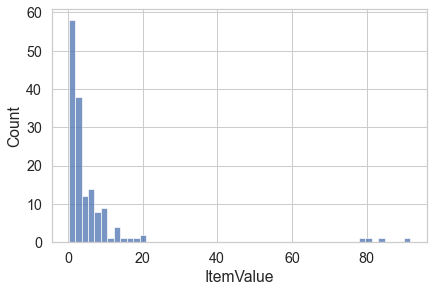

In [161]:
sns.histplot(data_df['ItemValue'])

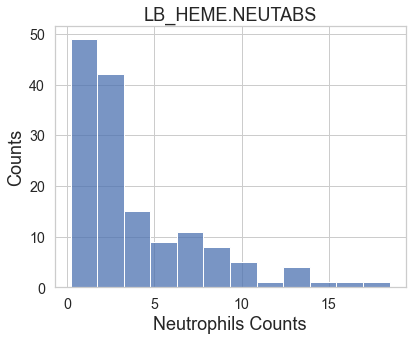

In [162]:
df = data_df.query("ItemValue < 20")
_, ax = plt.subplots(1, 1, figsize=(6, 5))
ax = sns.histplot(df.ItemValue, ax=ax, palette="Set3")
ax.set_xlabel("Neutrophils Counts", fontsize=18)
ax.set_ylabel("Counts", fontsize=18)
ax.set_title("LB_HEME.NEUTABS", fontsize=18)
plt.tight_layout()
plt.savefig(Path("figures/neutrophils_counts_less_20.png"), dpi=150, facecolor='w', bbox_inches='tight')
plt.show()
plt.close()

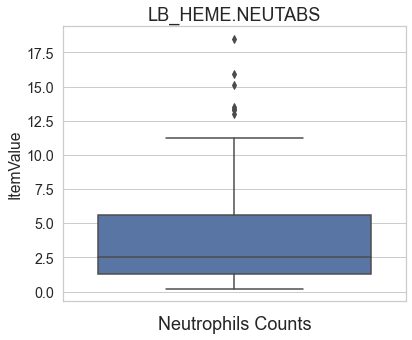

In [163]:
_, ax = plt.subplots(1, 1, figsize=(6, 5))
ax = sns.boxplot(y=df.ItemValue)
ax.set_xlabel("Neutrophils Counts", fontsize=18)
ax.set_title("LB_HEME.NEUTABS", fontsize=18)
plt.tight_layout()
plt.savefig(Path("figures/neutrophils_counts_less_20_whisker.png"), dpi=150, facecolor='w', bbox_inches='tight')
plt.show()
plt.close()

In [164]:
df.describe()

,ItemValue
count,147.000000
mean,3.864490
std,3.633315
min,0.200000
25%,1.280000
50%,2.500000
75%,5.600000
max,18.480000


## 4. Detecting `LB_HEME.NEUTABS` outliers

In [165]:
vals = data_df['ItemValue'].values
vals = vals.reshape(-1, 1)
vals.shape

(153, 1)

In [166]:
clf = MADClassifier()
clf.fit(vals)
preds = clf.predict(vals)
preds.shape

(153,)

In [167]:
t = vals[preds.astype(bool)].astype('float').ravel()
t.sort()
t

array([12.99, 13.3 , 13.38, 13.5 , 15.11, 15.9 , 18.48, 20.3 , 20.55,
       78.1 , 80.9 , 83.6 , 91.7 ])

In [168]:
clf = ECODClassifier()
clf.fit(vals)
preds = clf.predict(vals)
preds.shape

(153,)

In [169]:
t = vals[preds.astype(bool)].astype('float').ravel()
t.sort()
t

array([ 0.2 ,  0.21,  0.22,  0.32,  0.43,  0.44,  0.47,  0.47, 15.9 ,
       18.48, 20.3 , 20.55, 78.1 , 80.9 , 83.6 , 91.7 ])

In [170]:
query_data_df = nquery.query("ItemOID == 'LB_HEME.NEUTABS'")
query_data_df.shape

(61, 12)

In [171]:
query_data_df.head()

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
291,0007-008,LB_HEME,Hematology,LB_HEME.NEUTABS,Neutrophils Absolute Count,3.02,2.81 per source. Please update.,Neutrophil (abs count) calculated by adding se...,2015-11-20,2015-11-20,2016-02-18,3.02
1099,8800-007,LB_HEME,Hematology,LB_HEME.NEUTABS,Neutrophils Absolute Count,1.14,"please verify significance, as AE grade 2 was ...",confirmed with SI,2016-11-04,2017-01-30,2017-01-30,1.14
1267,0086-008,LB_HEME,Hematology,LB_HEME.NEUTABS,Neutrophils Absolute Count,1.58,Please assess if CS or NCS from the drop down ...,NaN,2016-11-16,2016-12-01,2016-12-16,1.58
1520,0400-008,LB_HEME,Hematology,LB_HEME.NEUTABS,Neutrophils Absolute Count,1.3,Please assess if CS or NCS from the drop down ...,UPDATED.,2017-03-13,2017-04-13,2017-04-14,1.30
1525,0400-008,LB_HEME,Hematology,LB_HEME.NEUTABS,Neutrophils Absolute Count,1.3,Please assess if CS or NCS from the drop down ...,UPDATED.,2017-03-13,2017-04-13,2017-04-14,1.30


In [172]:
query_data_df.describe()

,numItemValue
count,61.000000
mean,7.538197
std,15.321558
min,0.210000
25%,0.940000
50%,1.500000
75%,9.200000
max,91.700000


In [173]:
df = query_data_df.query("numItemValue < 20")
df = df.rename({"numItemValue":"LB_HEME.NEUTABS"}, axis=1)
df.describe()

,LB_HEME.NEUTABS
count,59.000000
mean,4.915763
std,5.280215
min,0.210000
25%,0.940000
50%,1.500000
75%,8.900000
max,18.480000


## 5. Analysis of `AE.AETOXGR`

In [174]:
data_df = nquery.query("ItemOID == 'AE.AETOXGR'").sort_values(by='SubjectID')
data_df

,SubjectID,FormOID,FormName,ItemOID,ItemLabel,ItemValue,QueryValue,QueryResponse,OpenDate,AnswerDate,CloseDate,numItemValue
5759,0001-002,AE,Adverse Events,AE.AETOXGR,Standard Toxicity Grade,2,Grade 2 per source. please update.,Updated,2016-01-06,2016-01-06,2016-03-29,2.0
5694,0001-007,AE,Adverse Events,AE.AETOXGR,Standard Toxicity Grade,1,Grade 1 per AE Toxicity Log. Please confirm.,Updated,2016-01-05,2016-01-05,2016-03-30,1.0
3230,0001-007,AE,Adverse Events,AE.AETOXGR,Standard Toxicity Grade,1,Per CTC grade 1 on 7/31/15 (1.5)and resolved t...,Updated,2016-01-05,2016-01-05,2016-03-30,1.0
5695,0001-007,AE,Adverse Events,AE.AETOXGR,Standard Toxicity Grade,1,Grade 1 per CTC. Please update EDC and AE Tox...,Updated,2016-01-05,2016-01-05,2016-03-29,1.0
2824,0007-007,AE,Adverse Events,AE.AETOXGR,Standard Toxicity Grade,3,Please confirm grade. Grade 5 is Death and yo...,NaN,2016-06-20,2016-06-24,2016-06-24,3.0
2917,0007-008,AE,Adverse Events,AE.AETOXGR,Standard Toxicity Grade,4,"Per SAE reconciliation, the clinical database ...",updated,2016-06-19,2016-06-20,2016-06-28,4.0
2818,0007-008,AE,Adverse Events,AE.AETOXGR,Standard Toxicity Grade,4,Grade 3 per Toxicity table in IHS. Please con...,updated,2016-06-20,2016-06-22,2016-06-24,4.0
3079,0084-008,AE,Adverse Events,AE.AETOXGR,Standard Toxicity Grade,1,Re-query: Previous query response states 'no g...,corrected,2016-04-29,2016-05-25,2016-06-13,1.0
3547,0085-002,AE,Adverse Events,AE.AETOXGR,Standard Toxicity Grade,5,"Severity is Grade 2, however Outcome is = Fata...",Updated,2016-10-24,2016-11-02,2016-11-07,5.0
5195,0085-007,AE,Adverse Events,AE.AETOXGR,Standard Toxicity Grade,4,Per SAE Reconciliation: the Safety Database do...,safety@clinipace.com,2016-02-25,2016-06-29,2016-07-04,4.0


In [175]:
data_df = audit.query("(SubjectID == '0007-007') & (ItemOID == 'AE.AETOXGR')").sort_values(by='EntryDate')
data_df.head(4)

,SubjectID,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,ActionCategory,SiteLocationID,EntryDate,ModifiedDate
44612,0007-007,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,1,Entered,080-0007,2016-02-03,2018-08-03
25769,0007-007,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,4,Entered,080-0007,2016-02-03,2018-08-03
25789,0007-007,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,1,Entered,080-0007,2016-02-03,2018-08-03
25814,0007-007,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,1,Entered,080-0007,2016-02-03,2018-08-03


In [176]:
data_df = audit.query("ItemOID == 'AE.AETOXGR'")
data_df.shape

(522, 10)

In [177]:
data_df.head()

,SubjectID,FormOID,ItemOID,FormOID_Description,ItemOID_Description,ItemValue,ActionCategory,SiteLocationID,EntryDate,ModifiedDate
284,0400-008,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,4,Entered,080-0400,2017-07-05,2018-08-03
698,0400-008,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,4,Entered,080-0400,2017-05-30,2018-08-03
716,0400-008,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,3,Entered,080-0400,2017-05-30,2018-08-03
741,0400-008,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,4,Entered,080-0400,2017-05-30,2018-08-03
1822,0007-007,AE,AE.AETOXGR,Adverse Events,Standard Toxicity Grade,3,Entered,080-0007,2017-02-02,2018-08-03


In [178]:
data_df.loc[:, "ItemValue"] = pd.to_numeric(data_df["ItemValue"], errors='coerce')
data_df = data_df.dropna(subset=['ItemValue'])
data_df.describe()

/var/folders/46/4k3zbt7527qgn5sdg7lzzxh80000gn/T/ipykernel_56868/1874757729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[:, "ItemValue"] = pd.to_numeric(data_df["ItemValue"], errors='coerce')
/var/folders/46/4k3zbt7527qgn5sdg7lzzxh80000gn/T/ipykernel_56868/1874757729.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_df.loc[:, "ItemValue"] = pd.to_numeric(data_df["ItemValue"], errors='coerce')


,ItemValue
count,511.000000
mean,1.970646
std,1.018033
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


<AxesSubplot:xlabel='ItemValue', ylabel='Count'>

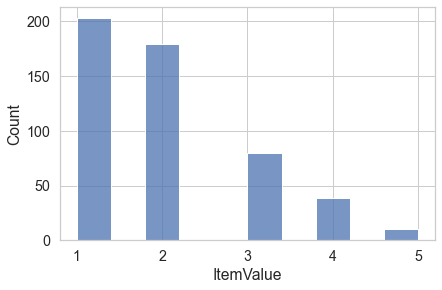

In [179]:
sns.histplot(data_df['ItemValue'])